<div class="alert alert-block alert-info">
    <h1>Projet Python SU-ISUP 2023-2024</h1>
    <hr style = "height:1px; border-width:0; color:gray; background-color:gray"/>
    <h2>Sommaire : </h2>
    <div>
        <ol>
            <li><h2>Programmation d'un réseau de neurone profond (feed forward)</h2>
                <ul>
                    <li><h4>Compréhension de la forward propagation</h4></li>
                    <li><h4>Compréhension de la bakward propagation</h4></li>
                    <li><h4>Implémentation de notre réseau de neurone feed forward</h4><ul>
                        <li>Implémentation d'une Class générique <strong>Layer</strong></li>
                        <li>Implémentation d'un layer <strong>dense</strong></li>
                        <li>Implémentation d'une Class générique <strong>Activation</strong></li>
                        <li>Implémentation de fonction d'activations</li>
                        <li>Implémentation de différentes <strong>fonctions de pertes</strong></li>
                        <li>Descente de gradient stochastique</li>
                        <li>Implémentation d'un modèle <strong>sequential</strong></li>
                        <li><strong>Softmax layer</strong></li>
                        <li><strong>Flatten layer</strong></li>
                        </ul>
                    </li>
                </ul>
            </li>
            <li><h2>Résolution de problèmes classiques de classification en comparant les résultats de nos modèles avec TensorFlow.</h2>
                <ul>
                    <li><h4>Classification sur des datasets de test</h4></li>
                    <li><h4>Classification sur des datasets réels</h4></li>
                    <li><h4>Classification d'images</h4></li>
                </ul>
            </li>
        </ol>   
    </div>
</div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

# I. Programation d'un réseau de neurone profond (feed forward)

## I.1 Forward Propagation

La propagation avant (forward propagation) est un processus clé dans les réseaux de neurones artificiels, qui sont utilisés dans le domaine de l'apprentissage profond (deep learning). Elle représente la phase au cours de laquelle les données d'entrée sont traitées par le réseau de neurones pour générer une prédiction ou une sortie. Voici une explication étape par étape de la forward propagation :
- Initialisation : Au début de la propagation avant, les poids et les biais du réseau de neurones sont initialisés de manière aléatoire. Cependant il existe des méthodes afin d'optimiser l'initialisation. Ces poids et biais constituent les paramètres appris par le réseau pendant l'entraînement.

- Entrée : Les données d'entrée sont introduites dans le réseau. Chaque nœud dans la couche d'entrée représente une caractéristique ou une variable de l'ensemble de données. Imaginons que nous avons 4 variables pour décrire un individu, il nous faudra donc 4 noeuds dans la couche d'entrée.

- Propagation à travers les couches cachées : Les données d'entrée sont propagées à travers les différentes couches cachées du réseau. Chaque couche est composée de neurones (ou unités) qui effectuent une combinaison linéaire des entrées pondérées par les poids, suivie de l'application d'une fonction d'activation.

- Combinaison linéaire : Chaque neurone multiplie les entrées par les poids associés, ajoute le biais correspondant, et obtient ainsi une somme pondérée.

- Fonction d'activation : Une fonction d'activation est appliquée à la sortie de la combinaison linéaire. Cette fonction introduit une non-linéarité dans le réseau, permettant au modèle d'apprendre des relations complexes.

- Propagation jusqu'à la couche de sortie : Les données traitées par les couches cachées sont propagées jusqu'à la couche de sortie. La couche de sortie effectue également une combinaison linéaire suivie d'une fonction d'activation, généralement différente de celle utilisée dans les couches cachées.

- Sortie : La sortie finale du réseau est générée à partir de la couche de sortie. Selon le type de problème (classification, régression, etc.), la sortie peut représenter des probabilités, des valeurs continues, des classes, etc.

- Calcul de l'erreur : La sortie du modèle est comparée aux vraies valeurs attendues. L'erreur, qui mesure la différence entre la prédiction du modèle et les vraies valeurs attendues, est calculée à l'aide d'une fonction de perte (loss function).

Formule associée à la foraward propagation d'une couche de neurone Dense

$$
\left\{
    \begin{array}\\
        y_{1} = x_{1}w_{11} + x_{2}w_{12} + \cdots + x_{i}w_{1i} + b_{1}\\
        y_{2} = x_{1}w_{21} + x_{2}w_{22} + \cdots + x_{i}w_{2i} + b_{2}\\
        y_{3} = x_{1}w_{31} + x_{2}w_{32} + \cdots + x_{i}w_{3i} + b_{3}\\
        \vdots\\
        y_{j} = x_{1}w_{j1} + x_{2}w_{j2} + \cdots + x_{i}w_{ji} + b_{j}\\    
    \end{array}
\right.
\hspace{0.2cm}
\Longleftrightarrow
\hspace{0.2cm}
\underset{\normalsize(j \times 1)}
  {
      \begin{bmatrix}
          y_{1}\\
          y_{2}\\
          \vdots\\
          y_{j}\\
      \end{bmatrix}
  } =
  \underset{\normalsize(j \times i)}
  {
      \begin{bmatrix}
          w_{11} & w_{12} & \cdots & w_{1i}\\
          w_{21} & w_{22} & \cdots & w_{2i}\\
          \vdots & \vdots & \ddots & \vdots\\
          w_{j1} & w_{j2} & \cdots & w_{ji}\\
      \end{bmatrix}
  }
  \hspace{0.2cm}
  \underset{\normalsize(i \times 1)}
  {
      \begin{bmatrix}
          x_{1}\\
          x_{2}\\
          \vdots\\
          x_{i}\\
      \end{bmatrix} 
  } +
  \underset{\normalsize(j \times 1)}
  {
      \begin{bmatrix}
          b_{1}\\
          b_{2}\\
          \vdots\\
          b_{j}\\
      \end{bmatrix}
   }
\hspace{0.5cm}
\Longleftrightarrow
\hspace{0.5cm}
Y = W \cdot X + B  
$$

Où :\
$Y$ : Sortie de la couche.\
$X$ : Donnée d'entrée de la couche.\
$W$ : Poids associés à la couche.\
$B$ : Biais associés à la couche.

## I.2 Backward Propagation

La rétropropagation du gradient (backward propagation) est une technique utilisée dans l'entraînement des réseaux de neurones pour ajuster les poids et les biais du réseau en fonction de l'erreur calculée lors de la forward propagation. Cette technique permet d'optimiser les paramètres du modèle afin de minimiser la différence entre les prédictions du réseau et les valeurs réelles. Voici comment fonctionne la backward propagation :

- Calcul de l'erreur : On calcule l'erreur en comparant la sortie du modèle avec la vérité terrain à l'aide d'une fonction de perte (loss function).

- Calcul du gradient : Le gradient de la fonction de perte par rapport aux poids et aux biais du réseau est calculé. Le gradient représente la direction dans laquelle la fonction de perte augmente le plus rapidement. On utilise la règle de la chaîne pour calculer ces gradients en remontant à travers le réseau.

- Mise à jour des poids et des biais : Les gradients calculés indiquent la direction dans laquelle les poids et les biais doivent être ajustés pour minimiser la fonction de perte. On utilise une technique d'optimisation, telle que la descente de gradient, pour mettre à jour les poids et les biais du réseau en fonction de ces gradients.

- Descente de gradient : On ajuste les poids et les biais en soustrayant un multiple du gradient de la fonction de perte par rapport à ces paramètres. Le taux d'apprentissage (learning rate) contrôle la taille des ajustements effectués à chaque étape.

Nous allons utiliser ici la Backward pass qui est une méthode plus efficient pour effectuer la backward propagation en effet on pourrait calculer à la main toutes toutes les dérivée partielle et les programmer directement. Mais le problème c'est que nous souhaitons avoir un code modulable, nous souhaitons pouvoir ajouter des couche, des neurones ... Nous allons donc utiliser une méthode de propagation du gradient vers l'arriere. Cette méthode est uniquement basé sur la formule de la chaine.

La méthode de backward pass permet d'ajuster les poids et les biais du réseau de manière à minimiser la fonction de perte. Voici comment fonctionne la backward pass en détail :

- Calcul de la dérivée de la fonction de perte : La première étape consiste à calculer la dérivée partielle de la fonction de perte par rapport à la sortie du réseau. Cette dérivée mesure à quel point la fonction de perte change en fonction des changements dans les sorties du réseau.

- Propagation du gradient à travers le réseau : Le gradient de la fonction de perte par rapport à la sortie est ensuite propagé en sens inverse à travers le réseau, couche par couche. **Pour chaque couche, on calcule le gradient de la fonction de perte par rapport à ses entrées (c'est-à-dire les sorties de la couche précédente). Cela se fait en utilisant la dérivée de la fonction d'activation de la couche.**

- Calcul des gradients par rapport aux paramètres : Une fois que le gradient de la fonction de perte par rapport aux sorties de chaque couche est calculé, on peut dériver les gradients par rapport aux poids et aux biais. **Cela se fait en utilisant les entrées de la couche correspondante et les gradients précédemment calculés.** Ces gradients représentent comment la fonction de perte change par rapport à chaque poids et chaque biais dans le réseau.

- Mise à jour des poids et des biais : Les gradients calculés sont utilisés pour mettre à jour les poids et les biais du réseau par descente de gradient.

Voici un présentation plus imagée de la Backward Porpagation et de l'impémentation que nous allons réaliser

In [2]:
from IPython.display import IFrame
url = "https://developers-dot-devsite-v2-prod.appspot.com/machine-learning/crash-course/backprop-scroll?hl=fr"
IFrame(url, width=800, height=700)

## I.3 Implémentation de notre réseau de neurone 

### Class Layer

Commencons par définir ce qu'est un layer. Un layer est donc un objet qui s'initialise avec un **nom** (self.name) ce qui nous permettra par la suite de faire un summary du modèle, ainsi que des **données d'entrées** (self.input) et la **sortie de la couche** (self.output). L'objet Layer possède de plus deux méthodes, la **forward_propagation** qui fait passer l'input dans le layer et calcul l'output (self.output) ainsi que la **backward_propagation** qui sera la pour calculer les dérivée partielles des poids et des biais en fonction de (output_gradient) ainsi que de mettre à jour les différents poids et biais grace au learning rate. 

In [3]:
class Layer():
    """ Base Layer Class"""
    def __init__(self):
        self.name = None
        self.input = None
        self.output = None
    def forward_propagation(self, x_input):
        pass
    def backward_propagation(self, output_gradient, learning_rate):
        pass

### Dense layer

Une couche dense, également appelée couche entièrement connectée, est l'une des architectures de base dans les réseaux de neurones artificiels. Elle fait partie intégrante des modèles de type perceptron multicouche (MLP), qui sont largement utilisés dans le domaine de l'apprentissage profond.

La caractéristique principale d'une couche dense est que chaque neurone dans cette couche est connecté à tous les neurones de la couche précédente et à tous les neurones de la couche suivante. Cela signifie que chaque entrée influence chaque sortie, et vice versa

- Entrées : Supposons que la couche dense reçoit des entrées provenant d'une couche précédente. Chaque entrée est associée à un poids spécifique.

- Combinaison linéaire : Chaque neurone dans la couche dense effectue une combinaison linéaire des entrées pondérées par les poids associés. Cela revient à multiplier chaque entrée par son poids correspondant et à additionner ces produits.

- Ajout du biais : Après la combinaison linéaire, un biais est ajouté à la somme pondérée. Le biais est un paramètre supplémentaire qui permet au modèle d'apprendre des décalages ou des déviations par rapport à une simple combinaison linéaire.

- Fonction d'activation : En général, une fonction d'activation est appliquée à la sortie de chaque neurone. La fonction d'activation introduit une non-linéarité dans le modèle, ce qui permet au réseau de neurones de capturer des relations complexes et non linéaires dans les données.

- Sortie : La sortie de chaque neurone devient l'entrée pour tous les neurones de la couche suivante.

Dans notre cas la fonction d'activation sera considérée comme une couche à part entière.

Le layer Dense s'initialise avec son **nom "Dense"**, la **taille des données d'entrée** (self.input_size), la **taille des données de sortie** (self.output_size) qui correspond donc au nombre de neurones dans la couche dense, ainsi qu'un **paramètre "use_bias"** qui permet à l'utilisateur d'utiliser un biais ou non. De plus, lors de l'initialisation, on initialise la **matrice des poids** (self.weights) et celle des **biais** (si l'option est activée) de manière aléatoire. Plusieurs méthodes existent pour optimiser le choix des poids et des biais ; ici, nous restons sur une méthode élémentaire.

La classe Dense hérite de celle du layer. Elle possède donc les deux méthodes élémentaires associées à chaque couche **(forward_propagation, backward_propagation)**. Pour cette couche, nous allons expliciter le chemin de pensée pour les calculs de dérivées partielles, mais la méthode reste approximativement la même pour tous les différents types de layers.

In [4]:
class Dense(Layer):
    """Dense Layer Class"""
    def __init__(self, input_size, output_size, use_bias = True):
        self.name = "Dense"
        self.use_bias = use_bias
        self.input_size = input_size
        self.output_size = output_size

        self.weights = np.random.randn(input_size, output_size) / np.sqrt(input_size + output_size)
        if use_bias:
            self.bias = np.random.randn(1, output_size) / np.sqrt(input_size + output_size) 
    
    def forward_propagation(self, x_input):
        self.input = x_input
        if self.use_bias:
            self.output = np.dot(self.input, self.weights) + self.bias
        else:
            self.output = np.dot(self.input, self.weights)
        return self.output
    
    def backward_propagation(self, output_gradient, learning_rate):
        input_gradient = np.dot(output_gradient, self.weights.T)
        self.weights_gradient = np.dot(self.input.T, output_gradient)
        
        if self.use_bias:
            self.bias_gradient = output_gradient
            self.bias = self.bias - learning_rate * self.bias_gradient
        self.weights = self.weights - learning_rate * self.weights_gradient
        
        return input_gradient

<div  class="alert alert-block alert-info">
    <h4>Backward pass du Dense layer</h4>
    <p>Nous sommes dans le $k$-ième layer dense du réseau de neurone, supposons qu'il soit composé de $j$ neurones et $i$ entrées.<br>
    Nous avons donc selon nôtre choix de notation pour l'implémentation :
        <ul>
            <li>matrice poids $W^{k}$ de taille (nombre d'entrées $\times$ nombre de neurones) = $(i , j)$ </li>
            <li>vecteur biais $B^{k}$ de taille (1 $\times$ nombre de neurones) = (1 , $j$)</li>
            <li>vecteur d'entré $X^{k}$ de taille (1 $\times$ nombre d'entrées) = (1, $i$)<br>
            Ce vecteur est en effet égale à $Y^{k-1}$ qui est la sortie du layer d'avant ($k-1$-ième layer) par forward propagation de ce dernier : $X^{k-1}\cdot W^{k-1} + B^{k-1} $ </li>
        </ul>
    </p>
    <p>On peut se représenter la forward propagation de ce dense layer comme une fonction $f_{dense}^{k}$ qui prend en paramètres $W^{k}$, $B^{k}$, $X^{k}$ et qui renvoi par combinaison linéaire $Y^{k} = X^{k}\cdot W^{k} + B^{k}$</p>
    <hr>
    <p>Notre but maintenant est de calculer le gradient de la fonction de perte notée $\mathit{L}$ par rapport à chacun des paramètre de $f_{dense}^{k}$ en fonction du gradient de la sortie du layer ($k$-ième layer) qui est aussi le gradient de l'entrée du layer suivant ($k+1$-ième layer).<br>
    On doit donc calculer : 
    <ul>
        <li>Pour la matrice des poids $\frac{\partial \mathit{L}}{\partial W^{k}}$ qui sera de même taille que $W^{k}$ c'est à dire de taille $(i , j)$</li>
        <li>Pour le vecteur des biais $\frac{\partial \mathit{L}}{\partial B^{k}}$ qui sera de même taille que $B^{k}$ c'est à dire de taille (1 , $j$)</li>
        <li>Pour le vecteur entrée $\frac{\partial \mathit{L}}{\partial X^{k}}$ qui sera de même taille que $X^{k}$ c'est à dire de taille (1 , $i$)</li>
    </ul>
    En fonction de $\frac{\partial \mathit{L}}{\partial X^{k+1}} = \frac{\partial \mathit{L}}{\partial Y^{k}}$ qui est un vecteur de même taille que $Y_{k} = X^{k+1}$ c'est à dire de taille (1, $j$)
    </p>
    <p>Essayons de se représenter chacun des élements suivant</p>
</div>

<div>
    On a donc :<br><br>
    $W^{k} = \begin{bmatrix}
                  w_{11} & w_{21} & \cdots & w_{j1}\\
                  w_{12} & w_{22} & \cdots & w_{j2}\\
                  \vdots & \vdots & \ddots & \vdots\\
                  w_{1i} & w_{2i} & \cdots & w_{ji}\\
              \end{bmatrix}$ De taille (nombre d'entrées $\times$ nombre de neurones) = $(i , j)$
    <br><br>
    $B^{k} = \begin{bmatrix}
                  b_{1} & b_{2} & \cdots & b_{j}
              \end{bmatrix}$ de taille (1 $\times$ nombre de neurones) = (1 , $j$)
    <br><br>
    $X^{k} = \begin{bmatrix}
                  x_{1} & x_{2} & \cdots & x_{i}
              \end{bmatrix}$ de taille (1 $\times$ nombre d'entrées) = (1 , $i$)
</div>

<div class="alert alert-block alert-info">
    En appliquant la formule de forward propagation qui est simplement la fonction $f_{dense}^{k}$ nous pouvons calculer $Y^{k}$ la sortie de notre layer dense ($k$-ième layer).<br>
    On a donc $Y^{k} = X^{k}\cdot W^{k} + B^{k}$
    <br>
</div>

D'un point de vu matriciel on a :

$
Y^{k} = X^{k} \cdot W^{k} + B^{k}
\hspace{0.5cm}
\Longleftrightarrow
\hspace{0.5cm}
\underset{\small(1 \times j)}
  {
      \begin{bmatrix}
          y_{1} & y_{2} & \cdots & y_{j}
      \end{bmatrix}
  } =
  \underset{\small(1 \times i)}
  {
      \begin{bmatrix}
          x_{1} & x_{2} & \cdots & x_{i}
      \end{bmatrix} 
  }
  \hspace{0.2cm}
  \underset{\small(i \times j)}
  {
      \begin{bmatrix}
          w_{11} & w_{21} & \cdots & w_{j1}\\
          w_{12} & w_{22} & \cdots & w_{j2}\\
          \vdots & \vdots & \ddots & \vdots\\
          w_{1i} & w_{2i} & \cdots & w_{ji}\\
      \end{bmatrix}
  }
  \hspace{0.2cm}
   +
  \underset{\small(j \times 1)}
  {
      \begin{bmatrix}
          b_{1} & b_{2} & \cdots & b_{j}
      \end{bmatrix}
   }  
$

<div class="alert alert-block alert-info">
$\frac{\partial \mathit{L}}{\partial Y^{k}}$ est la dérivée de la fonction de perte par rapport au vecteur de sortie $Y^{k}$. C'est un autre vecteur qui a exactement la même taille que $Y^{k}$ et pour lequel chaques composantes est la dérivée de la loss par rapport à la composante correspondante de $Y^{k}$.
Ce vecteur n'est définie que par recurrence, il provient du tout dernier layer du réseau et est propagé jusqu'au premier layer. Il est donc propagé vers l'arriere d'où le nom de "Backward Propagation".<br>
<br>Matricielement on a : <br>
<br>
$\frac{\partial \mathit{L}}{\partial Y^{k}} = \begin{bmatrix}
    \frac{\partial \mathit{L}}{\partial y_{1}} & \frac{\partial \mathit{L}}{\partial y_{2}} & \cdots 
    & \frac{\partial \mathit{L}}{\partial y_{j}}
\end{bmatrix}$<br>
<br>
Nous pouvons a présent calculer chacun des gradients
</div>

<div class="alert alert-block alert-info"> Commençons par calculer $\frac{\partial \mathit{L}}{\partial W^{k}}$ qui a la même taille que $W^{k}$ en fonction $\frac{\partial \mathit{L}}{\partial Y^{k}}$.<br>
</div>

<div>
    <br>
    $\frac{\partial \mathit{L}}{\partial W^{k}}$ est de la forme suivante : <br>
    $$\frac{\partial \mathit{L}}{\partial W^{k}} = \begin{bmatrix}
\frac{\partial \mathit{L}}{\partial W_{11}} & \frac{\partial \mathit{L}}{\partial W_{21}} & \cdots & \frac{\partial \mathit{L}}{\partial W_{j1}}\\
\frac{\partial \mathit{L}}{\partial W_{12}} & \frac{\partial\mathit{L}}{\partial W_{22}} & \cdots & \frac{\partial \mathit{L}}{\partial W_{j2}}\\
\vdots & \vdots & \ddots & \vdots\\
\frac{\partial\mathit{L}}{\partial W_{1i}} & \frac{\partial\mathit{L}}{\partial W_{2i}} & \cdots & \frac{\partial \mathit{L}}{\partial W_{ji}}
\end{bmatrix}$$
    <br><br>
    Essayons de calculer l'un des termes et généralison par la suite.
    <br><br>
    Calculons $\frac{\partial \mathit{L}}{\partial W_{21}}$
    <br>
    Par la formule de la chaine nous avons : 
    $\frac{\partial \mathit{L}}{\partial W_{21}} = \frac{\partial \mathit{L}}{\partial y_{1}}\frac{\partial y_{1}}{\partial W_{21}} + \frac{\partial\mathit{L}}{\partial y_{2}}\frac{\partial y_{2}}{\partial W_{21}} + \cdots + \frac{\partial \mathit{L}}{\partial y_{j}}\frac{\partial y_{j}}{\partial W_{21}}$
    <br>
    Nous devons maintenant calculer $\frac{\partial y_{1}}{\partial W_{21}}$, $\frac{\partial y_{2}}{\partial W_{21}}$, $\cdots$, $\frac{\partial y_{j}}{\partial W_{21}}$
    <br><br>
    En regardant dans la fromule de forward propagation 
    <br><br>
    $$Y^{k} = X^{k} \cdot W^{k} + B^{k} \Longleftrightarrow \left\{
    \begin{array}\\
        y_{1} = x_{1}w_{11} + x_{2}w_{12} + \cdots + x_{i}w_{1i} + b_{1}\\
        y_{2} = x_{1}w_{21} + x_{2}w_{22} + \cdots + x_{i}w_{2i} + b_{2}\\
        y_{3} = x_{1}w_{31} + x_{2}w_{32} + \cdots + x_{i}w_{3i} + b_{3}\\
        \vdots\\
        y_{j} = x_{1}w_{j1} + x_{2}w_{j2} + \cdots + x_{i}w_{ji} + b_{j}\\    
    \end{array}
\right. $$
    <br>
    on peut les calculer facilement.
    <br><br>
    En effet :
    <br>
    $\frac{\partial y_{2}}{\partial W_{21}} = x_{1}$<br>
    $\frac{\partial y_{l}}{\partial W_{21}} = 0 \hspace{1cm} \forall l \in \{ 1, 2, \cdots, j \}
    \mid l \neq 2$<br>
    <br>
    On obtient donc : <br>
    $$\frac{\partial \mathit{L}}{\partial W_{21}} = \frac{\partial \mathit{L}}{\partial y_{1}}\frac{\partial y_{1}}{\partial W_{21}} + \frac{\partial \mathit{L}}{\partial y_{2}}\frac{\partial y_{2}}{\partial W_{21}} + \cdots + \frac{\partial \mathit{L}}{\partial y_{j}}\frac{\partial y_{j}}{\partial W_{21}} = x_{1} \frac{\partial \mathit{L}}{\partial y_{2}}$$
    <br><br>
    En généralisant à chacune des composantes de $\frac{\partial \mathit{L}}{\partial W^{k}}$, on obtient le résultat suivant :<br><br>
    $$\frac{\partial \mathit{L}}{\partial W_{ji}} = x_{i}\frac{\partial \mathit{L}}{\partial y_{j}}\hspace{2cm}   \forall j \in \{ 1, 2, \cdots, j \}, \forall i \in \{ 1, 2, \cdots, i \}$$
   <br>
   Nous pouvons à présent reconstruire la matrice $\frac{\partial \mathit{L}}{\partial W^{k}}$<br><br>
   $$\frac{\partial \mathit{L}}{\partial W^{k}} = \begin{bmatrix}
x_{1}\frac{\partial \mathit{L}}{\partial y_{1}} & x_{1}\frac{\partial \mathit{L}}{\partial y_{2}} & \cdots & x_{1}\frac{\partial \mathit{L}}{\partial y_{j}}\\
x_{2}\frac{\partial \mathit{L}}{\partial y_{1}} & x_{2}\frac{\partial \mathit{L}}{\partial y_{2}} & \cdots & x_{2}\frac{\partial \mathit{L}}{\partial y_{j}}\\
\vdots & \vdots & \ddots & \vdots\\
x_{i}\frac{\partial \mathit{L}}{\partial y_{1}} & x_{i}\frac{\partial \mathit{L}}{\partial y_{2}} & \cdots & x_{i}\frac{\partial \mathit{L}}{\partial y_{j}}
\end{bmatrix}$$
    <br><br>
    On peut réecrire cette matrice de la forme suivante : <br><br>
    $$\begin{bmatrix}
x_{1}\frac{\partial \mathit{L}}{\partial y_{1}} & x_{1}\frac{\partial \mathit{L}}{\partial y_{2}} & \cdots & x_{1}\frac{\partial \mathit{L}}{\partial y_{j}}\\
x_{2}\frac{\partial \mathit{L}}{\partial y_{1}} & x_{2}\frac{\partial \mathit{L}}{\partial y_{2}} & \cdots & x_{2}\frac{\partial \mathit{L}}{\partial y_{j}}\\
\vdots & \vdots & \ddots & \vdots\\
x_{i}\frac{\partial \mathit{L}}{\partial y_{1}} & x_{i}\frac{\partial \mathit{L}}{\partial y_{2}} & \cdots & x_{i}\frac{\partial \mathit{L}}{\partial y_{j}}
\end{bmatrix} = \begin{bmatrix}
        x_{1}\\
       x_{2}\\
        \vdots\\
        x_{i}\\    
    \end{bmatrix}\begin{bmatrix}
    \frac{\partial \mathit{L}}{\partial y_{1}} & \frac{\partial \mathit{L}}{\partial y_{2}} & \cdots 
    & \frac{\partial \mathit{L}}{\partial y_{j}}
\end{bmatrix} = X^\mathsf{T} \cdot \frac{\partial \mathit{L}}{\partial Y^{k}} $$
    <br><br><br><br>
    Cela conclu le calcul du gradient $\frac{\partial \mathit{L}}{\partial W^{k}}$ en fonction de $\frac{\partial \mathit{L}}{\partial Y^{k}}$.   
</div>

<div  class="alert alert-block alert-warning"> Pour l'inplémentation en python on devra donc appliquer la formule suivante :<br><br>
    $$\frac{\partial \mathit{L}}{\partial W^{k}} = X^{\mathsf{T}}\cdot \frac{\partial \mathit{L}}{\partial Y^{k}}$$ avec $X = X^{k}$<br>
    Cette matrice peremetra de mettre à jour les poids $W^{k}$ lors de l'optimisation. Dans le cas de la descente de gradient on aura donc : <br> $$W^{k} = W^{k} - \alpha\frac{\partial\mathit{L}}{\partial W^{k}}$$ Avec $\alpha$ le learning rate.
</div>

<div class="alert alert-block alert-info"> Continuons en calculant $\frac{\partial \mathit{L}}{\partial B^{k}}$ qui a la même taille que $B^{k}$ en fonction $\frac{\partial \mathit{L}}{\partial Y^{k}}$.<br>
</div>

<div>
    <br>
    $\frac{\partial \mathit{L}}{\partial B^{k}}$ est de la forme suivante : <br>
    $$\frac{\partial \mathit{L}}{\partial B^{k}} = \begin{bmatrix}
    \frac{\partial \mathit{L}}{\partial b_{1}} & \frac{\partial \mathit{L}}{\partial b_{2}}& \cdots & \frac{\partial \mathit{L}}{\partial b_{j}}
              \end{bmatrix}$$
    <br><br>
    Essayons de calculer l'un des termes et généralison par la suite.
    <br><br>
    Calculons $\frac{\partial \mathit{L}}{\partial b_{1}}$
    <br>
    Par la formule de la chaine nous avons : 
    $\frac{\partial \mathit{L}}{\partial b_{1}} = \frac{\partial \mathit{L}}{\partial y_{1}}\frac{\partial y_{1}}{\partial b_{1}} + \frac{\partial \mathit{L}}{\partial y_{2}}\frac{\partial y_{2}}{\partial b_{1}} + \cdots + \frac{\partial \mathit{L}}{\partial y_{j}}\frac{\partial y_{j}}{\partial b_{1}}$
    <br>
    Nous devons maintenant calculer $\frac{\partial y_{1}}{\partial b_{1}}$, $\frac{\partial y_{2}}{\partial b_{1}}$, $\cdots$, $\frac{\partial y_{l}}{\partial b_{1}} \hspace{1cm} \forall l \in \{ 1, 2, \cdots, j \}$
    <br><br>
    En regardant dans la fromule de forward propagation 
    <br><br>
    $$Y^{k} = X^{k} \cdot W^{k} + B^{k} \Longleftrightarrow \left\{
    \begin{array}\\
        y_{1} = x_{1}w_{11} + x_{2}w_{12} + \cdots + x_{i}w_{1i} + b_{1}\\
        y_{2} = x_{1}w_{21} + x_{2}w_{22} + \cdots + x_{i}w_{2i} + b_{2}\\
        y_{3} = x_{1}w_{31} + x_{2}w_{32} + \cdots + x_{i}w_{3i} + b_{3}\\
        \vdots\\
        y_{j} = x_{1}w_{j1} + x_{2}w_{j2} + \cdots + x_{i}w_{ji} + b_{j}\\    
    \end{array}
\right. $$
    <br>
    on peut les calculer facilement.
    <br><br>
    En effet :
    <br>
    $\frac{\partial y_{1}}{\partial b_{1}} = 1$<br>
    $\frac{\partial y_{l}}{\partial b_{1}} = 0 \hspace{1cm} \forall l \in \{ 1, 2, \cdots, j \} \mid l \neq 1$<br>
    <br>
    On obtient donc : <br>
    $$\frac{\partial \mathit{L}}{\partial b_{1}} = \frac{\partial \mathit{L}}{\partial b_{1}} = \frac{\partial \mathit{L}}{\partial y_{1}}\frac{\partial y_{1}}{\partial b_{1}} + \frac{\partial \mathit{L}}{\partial y_{2}}\frac{\partial y_{2}}{\partial b_{1}} + \cdots + \frac{\partial \mathit{L}}{\partial y_{j}}\frac{\partial y_{j}}{\partial b_{1}} = \frac{\partial \mathit{L}}{\partial y_{1}}$$
    <br><br>
    En généralisant à chacune des composantes de $\frac{\partial \mathit{L}}{\partial B^{k}}$, on obtient le résultat suivant :<br><br>
    $$\frac{\partial \mathit{L}}{\partial b_{j}} = \frac{\partial \mathit{L}}{\partial y_{j}}\hspace{2cm}   \forall j \in \{ 1, 2, \cdots, j \}$$
   <br>
   Nous pouvons à présent reconstruire la matrice $\frac{\partial \mathit{L}}{\partial W^{k}}$<br><br>
   $$\frac{\partial \mathit{L}}{\partial B^{k}} = \begin{bmatrix}
    \frac{\partial \mathit{L}}{\partial y_{1}} & \frac{\partial \mathit{L}}{\partial y_{2}}& \cdots & \frac{\partial \mathit{L}}{\partial y_{j}}
              \end{bmatrix} = \frac{\partial \mathit{L}}{\partial Y^{k}} $$
    <br><br>
    Cela conclu le calcul du gradient $\frac{\partial \mathit{L}}{\partial W^{k}}$ en fonction de $\frac{\partial \mathit{L}}{\partial Y^{k}}$.   
</div>

<div  class="alert alert-block alert-warning"> Pour l'inplémentation en python on devra donc appliquer la formule suivante :<br><br>
    $$\frac{\partial \mathit{L}}{\partial B^{k}} = \frac{\partial \mathit{L}}{\partial Y^{k}}$$<br>
    Cette matrice peremetra de mettre à jour les biais $B^{k}$ lors de l'optimisation. Dans le cas de la descente de gradient on aura donc : <br> $$B^{k} = B^{k} - \alpha\frac{\partial \mathit{L}}{\partial B^{k}}$$ Avec $\alpha$ le learning rate.
</div>

### Activation layer et fonctions d'activation

La fonction d'activation dans un réseau de neurones artificiels introduit une non-linéarité dans le modèle. Elle est appliquée à la sortie d'un neurone ou d'une couche de neurones pour permettre au réseau de capturer des relations non linéaires dans les données. Le principe fondamental de la fonction d'activation réside dans son rôle d'introduction de complexité dans le modèle.

Voici quelques points clés sur le principe de la fonction d'activation :

- Non-linéarité : Si une fonction d'activation n'était pas utilisée, ou si elle était une fonction linéaire, la composition de plusieurs couches de neurones serait équivalente à une seule couche. Cela limiterait la capacité du modèle à représenter des relations complexes entre les entrées et les sorties.

- Apprentissage de représentations complexes : Les données du monde réel sont souvent complexes et non linéaires. L'utilisation de fonctions d'activation non linéaires permet aux réseaux de neurones d'apprendre et de représenter des modèles plus complexes, ce qui est essentiel pour résoudre des problèmes complexes tels que la vision par ordinateur, la reconnaissance vocale, etc.

- Introduction de seuils et de seuils d'activation : Certaines fonctions d'activation, comme la fonction sigmoïde et la fonction tangente hyperbolique, introduisent des seuils qui déterminent quand un neurone devrait être activé ou non. Cela peut être interprété comme une manière d'introduire des décisions dans le modèle.

- Stabilisation et régularisation : Certaines fonctions d'activation, comme la fonction ReLU (Rectified Linear Unit), ont des propriétés de régularisation qui aident à stabiliser l'apprentissage du réseau. La ReLU, par exemple, a une sortie nulle pour des entrées négatives, ce qui peut aider à atténuer le problème du gradient qui peut se produire lors de l'entraînement.

Le layer d'activation s'initialise avec un **nom** passé en argument, une **fonction d'activation** ainsi que **sa dérivée**. Cette classe, héritant de la classe de base du layer, possède les deux méthodes principales. La méthode **forward_propagation** applique la fonction d'activation au vecteur des inputs. La méthode **backward_propagation** calcule le gradient du vecteur d'entré en fonction de output_gradient. Ceci est rendu possible grâce à l'utilisation de la bibliothèque NumPy, qui permet d'appliquer des fonctions à des vecteurs.

In [5]:
class Activation(Layer):
    """Base class of an activation layer"""
    def __init__(self, name, activation_function, activation_deriv):
        self.name = name
        self.activation_function = activation_function
        self.activation_deriv = activation_deriv
        
    def forward_propagation(self, x_input):
        self.input = x_input
        self.output = self.activation_function(self.input)
        return self.output
    
    def backward_propagation(self, output_gradient, learning_rate):
        return output_gradient * self.activation_deriv(self.input)

Il existe un certain nombre de fonctions d'activations celles que nous allons implémenter sont :
- Tangeante hyperbolique (Tanh)
- Sigmoid
- Relu

$$\text{tanh}(x) = \frac{e^{2x} - 1}{e^{2x} + 1} \qquad \frac{d}{dx} \text{tanh}(x) = 1 - \text{tanh}^2(x)$$
$$\text{sigmoid}(x) = \frac{1}{1 + e^{-x}} \qquad \frac{d}{dx}\text{sigmoid}(x) = \frac{e^{-x}}{(1 + e^{-x})^2}$$

$$\text{ReLU}(x) = \max(0, x)\qquad\frac{d}{dx} \text{ReLU}(x) = \begin{cases} 0 & \text{si } x < 0 \\ 1 & \text{si } x \geq 0 \end{cases}$$

Voici la représentation graphique de chacune de ces fonctions :

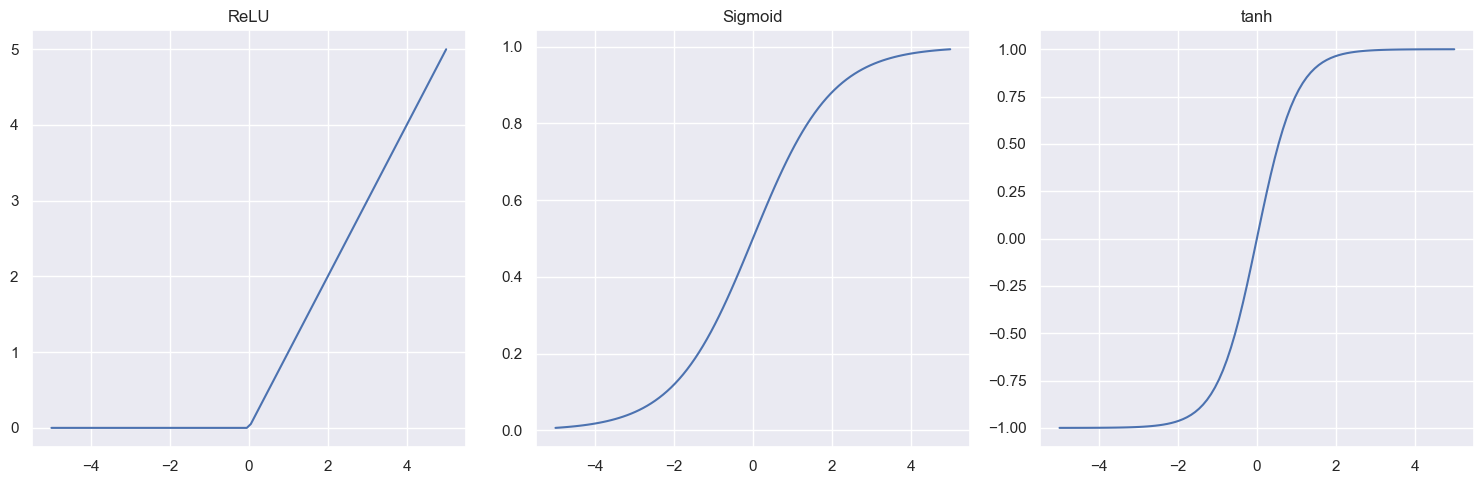

In [6]:
x_values = np.linspace(-5, 5, 100)
relu_values = np.maximum(0, x_values)
sigmoid_values = 1 / (1 + np.exp(-x_values))
tanh_values = np.tanh(x_values)
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
ax1.plot(x_values, relu_values, label='ReLU')
ax1.set_title('ReLU')
ax2.plot(x_values, sigmoid_values, label='Sigmoid')
ax2.set_title('Sigmoid')
ax3.plot(x_values, tanh_values, label='tanh')
ax3.set_title('tanh')
plt.tight_layout()
plt.show()

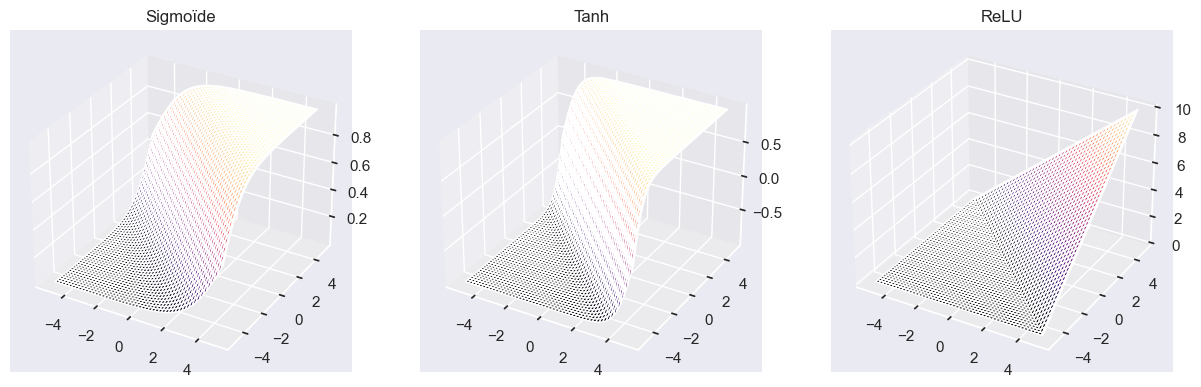

In [7]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)

x, y = np.meshgrid(x, y)

sig = sigmoid(x + y)
tanh = np.tanh(x + y)
relu = np.maximum(0, x + y)

fig, ax = plt.subplots(1, 3, figsize=(15, 5), subplot_kw={'projection': '3d'})

# Premier sous-graphique : sigmoïde
ax[0].plot_surface(x, y, sig, cmap = "magma")
ax[0].set_title('Sigmoïde')

ax[1].plot_surface(x, y, tanh, cmap = "magma")
ax[1].set_title('Tanh')

ax[2].plot_surface(x, y, relu, cmap = "magma")
ax[2].set_title('ReLU')

plt.show()

In [8]:
class Tanh(Activation):
    def __init__(self):
        tanh = lambda x: np.tanh(x)
        tanh_deriv = lambda x: 1 - np.tanh(x) ** 2
        super().__init__("Tanh", activation_function = tanh, activation_deriv = tanh_deriv)
    

class Sigmoid(Activation):
    def __init__(self):
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        sigmoid_deriv = lambda x: np.exp(-x) / (1 + np.exp(-x))**2
        super().__init__("Sigmoid", activation_function = sigmoid, activation_deriv = sigmoid_deriv)


class Relu(Activation):
    def __init__(self):
        relu = lambda x: np.maximum(x, 0)
        relu_deriv = lambda x: np.array(x > 0).astype('int')
        super().__init__("Relu", activation_function = relu, activation_deriv = relu_deriv)

### Fonctions de perte

Les fonctions de perte, également appelées fonctions d'erreur ou losse functions, sont utilisées pour évaluer la disparité entre les prédictions d'un modèle et les valeurs réelles des données d'entraînement. L'objectif est de minimiser cette fonction de perte afin d'optimiser les paramètres du modèle et d'améliorer sa capacité à faire des prédictions précises. Les choix de la fonction de perte dépendent souvent du type de tâche que le modèle doit accomplir, comme la classification, la régression, la segmentation, etc.

Le but dans un réseau de neurones est de minimiser l'erreur du modèle sur les données d'apprentissage. Afin d'estimer l'erreur d'un modèle, il existe différentes fonctions que l'on appelle des fonctions de perte. Ces fonctions de perte prennent en paramètre la sortie du réseau, c'est-à-dire la prédiction effectuée par la propagation avant, ainsi qu'un nombre équivalent de valeurs réelles. La fonction de perte va comparer les prédictions aux valeurs réelles. L'objectif pour le modèle est de minimiser cette perte afin de réduire l'erreur générale du modèle.

Comme vu précédemment, la perte dépend de la propagation avant, donc de chacun des poids et des biais du modèle. L'objectif est d'améliorer ces poids et biais pour minimiser la perte. La perte d'un réseau de neurones ne peut pas être représentée graphiquement, car dans la plupart des cas, un réseau dépend de bien plus de 2 paramètres (qui est le maximum pour être représenté graphiquement) et possède souvent des milliers de paramètres.

La fonction de perte est une fonction dépendante de : $W$ les poids,  $B$ les biais\
Soit $L$ la fonction de perte. Nous souhaitons donc minimiser cette fonction afin de trouver les paramètres $W$ et $B$ optimaux.
On cherche : 
$$\arg \min_{W, B} L(W, B)$$

Il existe un très grand nombre de fonction de perte celle qui nous interressent sont : 

- MSE : La formule calcule la moyenne des carrés des différences entre les valeurs réelles et les prédictions du modèle. Élever au carré donne plus de poids aux erreurs importantes, ce qui signifie que la MSE pénalise davantage les erreurs importantes que les erreurs plus petites.

$$\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$$
$$\frac{\partial \text{MSE}}{\partial \hat{y}_i} = \frac{2}{n} (\hat{y}_i - y_i)$$

Où : \\
n : nombre d'observations dans l'ensemble de données\
$y_i$ : valeur réelle de la cible pour l'observation $i$\
$\hat{y}_i$ : prédiction du modèle pour l'observation $i$ 

- Binary Cross Entropy : La Binary Cross Entropy (ou entropie croisée binaire) est une fonction de perte couramment utilisée dans les tâches de classification binaire. Elle mesure la disparité entre la distribution de probabilité prédite par le modèle et la distribution de probabilité réelle des classes. Cette fonction est particulièrement adaptée aux problèmes où chaque instance d'entraînement peut appartenir à une et une seule classe.
La fonction de perte mesure la divergence entre la distribution de probabilité prédite et la distribution réelle. Elle attribue une pénalité plus importante aux prédictions incorrectes en utilisant le terme logarithmique.La première partie pénalise les prédictions fausses lorsque la classe réelle est 1, tandis que la deuxième partie pénalise les prédictions fausses lorsque la classe réelle est 0.

$$\text{Binary Cross Entropy} = -\frac{1}{N} \sum_{i=1}^{N} [y_i \log(\hat{y}_i) + (1 - y_i) \log(1 - \hat{y}_i)]$$
$$\frac{\partial \text{Binary Cross Entropy}}{\partial \hat{y}_i} = -\frac{1}{N} \left( \frac{y_i}{\hat{y}_i} - \frac{1 - y_i}{1 - \hat{y}_i} \right)$$

Où :\
N: Nombre total d'observations dans l'ensemble de données \
$y_i$: Classe réelle de l'observation $i$ (0 ou 1)\
$\hat{y}_i$ : Probabilité prédite par le modèle que l'observation $i$ appartienne à la classe 1

- Categorical Cross Entropy : La Cross Entropy Categorical (ou entropie croisée catégorique) est une fonction de perte utilisée dans les tâches de classification multiclasse, où chaque instance d'entraînement peut appartenir à une seule classe parmi plusieurs classes. Contrairement à la Binary Cross Entropy qui est utilisée pour des tâches de classification binaire, la Cross Entropy Categorical s'applique à des problèmes de classification avec plus de deux classes.

$$\text{Categorical Cross Entropy} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{j=1}^{C} y_{ij} \log(\hat{y}_{ij})$$
$$\frac{\partial \text{Categorical Cross Entropy}}{\partial \hat{y}_{ij}} = -\frac{1}{N} \frac{y_{ij}}{\hat{y}_{ij}}$$

Où :\
N : Nombre total d'observations dans l'ensemble de données.\
C : Nombre total de classes.\
$y_{ij}$ : Indicateur binaire qui vaut 1 si l'observation $i$ appartient à la classe $j$ et 0 sinon.\ $\hat{y}_{ij}$ : Probabilité prédite par le modèle que l'observation $i$ appartienne à la classe $j$.

In [9]:
class MSE():
    def compute_loss(self, y_true , y_pred):
        return np.mean(np.power(y_true - y_pred, 2))
    def compute_loss_grad(self, y_true, y_pred):
        return 2 * (y_pred - y_true) / np.size(y_true)


class binary_cross_entropy():
    def compute_loss(self, y_true , y_pred):
        return np.mean(-y_true * np.log(y_pred) - (1 - y_true) * np.log(1 - y_pred))
    def compute_loss_grad(self, y_true, y_pred):
        return ((1 - y_true) / (1 - y_pred) - y_true / y_pred) / np.size(y_true)


class CategoricalCrossentropy():
    def compute_loss(self, y_true, y_pred):
        # Clip values to avoid log(0) issues
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # Calculate categorical crossentropy loss
        loss = -np.sum(y_true * np.log(y_pred)) / len(y_true)
        return loss
    def compute_loss_grad(self, y_true, y_pred):
        # Clip values to avoid division by zero issues
        epsilon = 1e-15
        y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
        # Calculate categorical crossentropy gradient
        grad = -y_true / y_pred / len(y_true)
        return grad

### Optimisation de la fonction de perte

Comme vu précédemment, l'objectif de l'apprentissage est de trouver les poids et biais qui minimisent la fonction de perte. Pour ce faire, nous utilisons des méthodes d'optimisation. Il en existe de nombreuses, des plus simples telles que la méthode de Newton, aux plus complexes telles que la méthode ADAM, AdaGrad ou RMSprop. Dans ce contexte, nous nous concentrerons sur l'une des méthodes les plus utilisées et les plus connues : la méthode de descente de gradient, et plus particulièrement la méthode de descente de gradient stochastique.

$$W_{n+1} = W_{n} - \eta \nabla L(W_{n})$$

Où :
$W_{n+1}$: Nouveaux poids du modèle\
$W_{n}$ : Anciens poids du modèle
$\eta$ : Taux d'apprentissage / learning rate \
$\nabla L$ : Gradient partiel de la fonction de coût par rapport aux poids du modèle\
$L$ : Fonction de coût

La différence entre la descente de gradient classique et la descente de gradient stochastique réside dans la manière dont les mises à jour des paramètres sont effectuées. Dans la descente de gradient classique, les mises à jour sont réalisées en utilisant le gradient total de la fonction de coût calculé sur l'ensemble complet des données d'entraînement. Ainsi, une seule mise à jour est effectuée après avoir parcouru l'intégralité de l'ensemble des données.

En revanche, dans la descente de gradient stochastique (SGD), une mise à jour est effectuée après chaque exemple d'entraînement individuel. Cette approche rend les mises à jour beaucoup plus fréquentes, car chaque exemple contribue à l'ajustement des paramètres du modèle de manière itérative.

### Visualisation de la descente de gradient

In [10]:
import ipympl
%matplotlib widget
from IPython import display
from matplotlib.animation import FuncAnimation

#### Descente de gradient à une variable

In [11]:
def une_variable(f, f_prime, starting_position, learning_rate, Max_iter, x):
    newx = starting_position
    res = [newx]
    for i in range(Max_iter):
        newx = newx - learning_rate * f_prime(newx)
        res.append(newx)

    # Affichage
    fig = plt.figure()
    plt.plot(x, f(x))
    plt.title(f"Descent de gradient / learning rate : {learning_rate} / Iteration : {Max_iter} / Point de départ : x = {starting_position}")

    points, = plt.plot([], [], 'or',ms=7)

    def animate_gradient(frame):
        points.set_data([res[frame]], [f(res[frame])])
        return points,

    anim = FuncAnimation(fig=fig, func=animate_gradient, frames=len(res), interval=500, repeat=True)

    video = anim.to_html5_video()
    html = display.HTML(video)
    display.display(html) 
    plt.close() 

In [12]:
def f(x):
    return x**2
def f_prime(x):
    return 2*x

starting_position = -80
learning_rate = 0.1
Max_iter = 20
x = np.arange(-100, 100, 0.1)
une_variable(f, f_prime, starting_position, learning_rate, Max_iter, x)

In [13]:
def f(x):
    return np.sin(x)
def f_prime(x):
    return np.cos(x)

starting_position = 1
learning_rate = 0.1
Max_iter = 40
x = np.arange(-4, 4, 0.01)

une_variable(f, f_prime, starting_position, learning_rate, Max_iter, x)

#### Impact du learning rate sur la convergence de la méthode

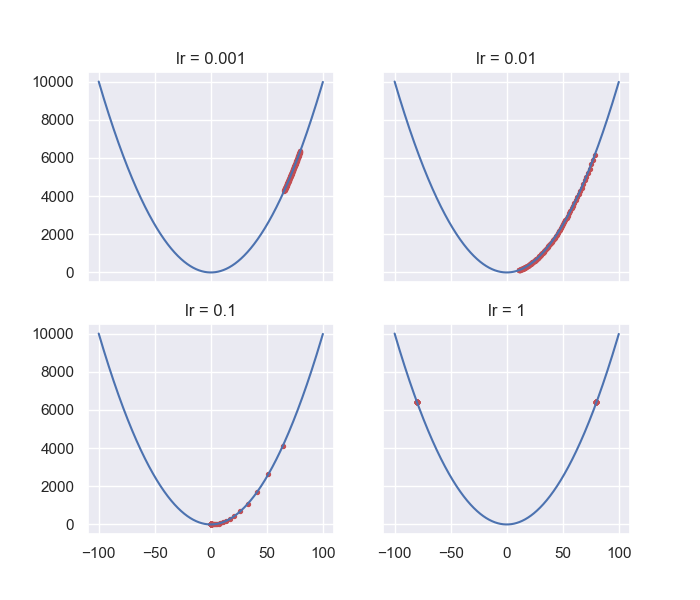

In [14]:
def f(x):
    return x**2
def f_prime(x):
    return 2*x

starting_position = 80
learning_rate = [0.001, 0.01, 0.1, 1]
Max_iter = 100
x = np.arange(-100, 100, 0.1)
fig1, ax = plt.subplots(2, 2, figsize=(7, 6), sharex=True, sharey=True)
x = np.arange(-100, 100, 0.1)
for axis, lr in zip(ax.flat, learning_rate):
    res = []
    newx = starting_position = 80
    for i in range(Max_iter):
        newx = newx - lr * f_prime(newx)
        res.append(newx)
    
    axis.plot(x, f(x))
    axis.set_title(f'lr = {lr}');
    axis.scatter(res, f(np.array(res)), s = 8, c= 'r')   

Nous pouvons observer le rôle important que le taux d'apprentissage joue dans l'optimisation de la fonction. Pour le même nombre d'itérations, nous ne nous retrouvons pas avec les mêmes minima locaux. En effet, avec un taux d'apprentissage de 1, nous constatons des oscillations des deux côtés du graphe ce qui n'entraine pas de convergence.Avec un taux d'apprentissage de 0.001, la convergence est trop lente et n'atteint pas le minimum recherché au bout du nombre d'itérations fixé. En revanche, un taux d'apprentissage de 0.1 a très bien convergé vers le minimum.

#### Descente de gradient à deux variables

In [15]:
%matplotlib widget
from matplotlib import cm

In [16]:
def deux_variables(f, f_grad, starting_position, learning_rate, Max_iter, x, y):
    X, Y = np.meshgrid(x, y)
    Z = f(X, Y)

    newx = starting_position
    X_res = [newx[0]]
    Y_res = [newx[1]]

    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(projection = "3d", computed_zorder = False)
    ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues, zorder = 0)

    for i in range(Max_iter):
        newx = newx[0] - learning_rate * f_grad(newx[0], newx[1])[0] , newx[1] - learning_rate * f_grad(newx[0], newx[1])[1]
        X_res.append(newx[0])
        Y_res.append(newx[1])

        if i%20 == 0:
            ax.scatter(newx[0],  newx[1], f( newx[0],  newx[1]), c = 'r', s = 3)
    

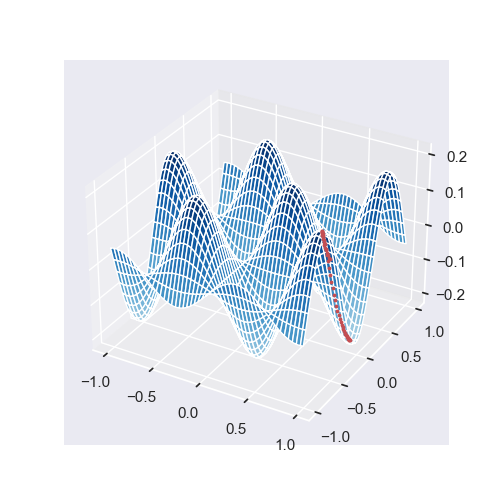

In [17]:
def f(x, y):
    return np.sin(5 * x) * np.cos(5 * y)/5

def f_grad(x, y):
    return np.cos(5 * x) * 5 * np.cos(5 * y)/5 , -5 * np.cos(5 * x) * np.sin(5 * y)/5

starting_position = (0.5, 0.4)
learning_rate = 0.001
Max_iter = 1000
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)
deux_variables(f, f_grad, starting_position, learning_rate, Max_iter, x, y)

#### Importance du point de départ et convergence vers un minimum local

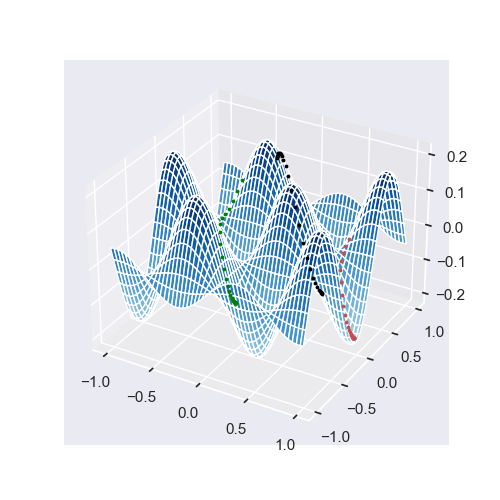

In [18]:
%matplotlib widget
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Choix des paramètres
def f(x, y):
    return np.sin(5 * x) * np.cos(5 * y) / 5

def f_grad(x, y):
    return np.cos(5 * x) * 5 * np.cos(5 * y) / 5, -5 * np.cos(5 * x) * np.sin(5 * y) / 5

starting_position1 = (0.7, 0.4)
starting_position2 = (-0.3, 0.8)
starting_position3 = (-0.5, 0.5)

learning_rate = 0.01
Max_iter = 150
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

newx1 = starting_position1
newx2 = starting_position2
newx3 = starting_position3

fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(projection="3d", computed_zorder=False)
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues, zorder=0)

for i in range(Max_iter):
    newx1 = newx1[0] - learning_rate * f_grad(newx1[0], newx1[1])[0], newx1[1] - learning_rate * f_grad(newx1[0], newx1[1])[1]
    newx2 = newx2[0] - learning_rate * f_grad(newx2[0], newx2[1])[0], newx2[1] - learning_rate * f_grad(newx2[0], newx2[1])[1]
    newx3 = newx3[0] - learning_rate * f_grad(newx3[0], newx3[1])[0], newx3[1] - learning_rate * f_grad(newx3[0], newx3[1])[1]

    if i % 5 == 0:
        ax.scatter(newx1[0], newx1[1], f(newx1[0], newx1[1]), c='r', s=3)
        ax.scatter(newx2[0], newx2[1], f(newx2[0], newx2[1]), c='black', s=3)
        ax.scatter(newx3[0], newx3[1], f(newx3[0], newx3[1]), c='green', s=3)

plt.show()

Nous pouvons observer qu'en partant de différents points de départ, la convergence n'est pas la même ; les algorithmes d'optimisation ne convergent que vers des minima locaux et non globaux. En effet, selon le point de départ initial, l'algorithme peut converger vers des régions différentes de la fonction de perte.

Chaque point de départ initial influence le chemin que prend l'algorithme d'optimisation, et il peut se retrouver piégé dans différents minima locaux en fonction de cette initialisation. Cela met en évidence la sensibilité de certains algorithmes d'optimisation aux conditions initiales.

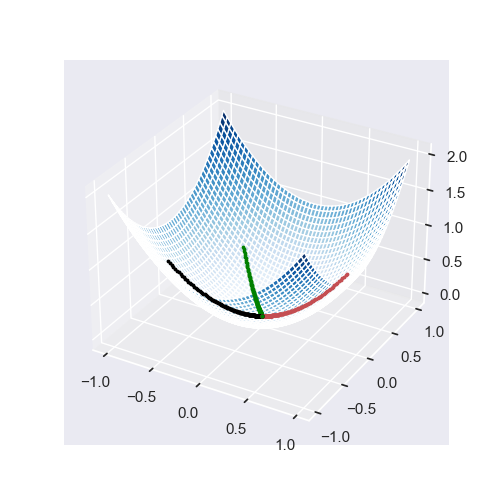

In [19]:
def f(x, y):
    return x**2 + y**2

def f_grad(x, y):
    return 2*x  , 2*y 

starting_position1 = (0.7, 0.4)
starting_position2 = (-0.8, -0.4)
starting_position3 = (-0.5, 0.5)

learning_rate = 0.01
Max_iter = 500
x = np.arange(-1, 1, 0.01)
y = np.arange(-1, 1, 0.01)


X, Y = np.meshgrid(x, y)
Z = f(X, Y)

newx1 = starting_position1
newx2 = starting_position2
newx3 = starting_position3

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(projection = "3d", computed_zorder = False)
ax.plot_surface(X, Y, Z, vmin=Z.min() * 2, cmap=cm.Blues, zorder = 0)

for i in range(Max_iter):
    newx1 = newx1[0] - learning_rate * f_grad(newx1[0], newx1[1])[0] , newx1[1] - learning_rate * f_grad(newx1[0], newx1[1])[1]
    newx2 = newx2[0] - learning_rate * f_grad(newx2[0], newx2[1])[0] , newx2[1] - learning_rate * f_grad(newx2[0], newx2[1])[1]
    newx3 = newx3[0] - learning_rate * f_grad(newx3[0], newx3[1])[0] , newx3[1] - learning_rate * f_grad(newx3[0], newx3[1])[1]

    
    if i%1 == 0:
        ax.scatter(newx1[0],  newx1[1], f( newx1[0],  newx1[1]), c = 'r', s = 3)
        ax.scatter(newx2[0],  newx2[1], f( newx2[0],  newx2[1]), c = 'black', s = 3)
        ax.scatter(newx3[0],  newx3[1], f( newx3[0],  newx3[1]), c = 'green', s = 3)

In [20]:
%matplotlib inline

### Modèle sequentiel

Un modèle séquentiel est une architecture simple où les différentes couches du réseau sont empilées de manière séquentielle. Chaque couche du réseau reçoit les sorties de la couche précédente comme entrées et transmet ses sorties à la couche suivante. 

Nous nous inspirerons largement de l'approche adoptée par TensorFlow avec Keras pour structurer notre modèle séquentiel.

In [21]:
import sklearn.datasets

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from keras.utils import np_utils

import pandas as pd
from sklearn.preprocessing import StandardScaler

In [22]:
iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X_IRIS, y_IRIS = iris.data, iris.target

scaler = StandardScaler()
X_IRIS = scaler.fit_transform(X_IRIS)
print(X_IRIS.shape)
print(y_IRIS.shape)

(150, 4)
(150,)


In [23]:
# Encodage des étiquettes avec One-Hot Encoding
y_IRIS_encode = np_utils.to_categorical(y_IRIS)

# Création du modèle séquentiel
model = Sequential()

# Ajout d'une couche dense avec activation ReLU et spécification de la dimension d'entrée
model.add(Dense(units=10, activation='tanh'))

# Ajout d'une couche dense avec activation sigmoid pour la classification (3 classes dans IRIS)
model.add(Dense(units=3, activation='Softmax'))

# Compilation du modèle avec une fonction de perte, un optimiseur et une métrique spécifiques
model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['acc'])

# Entraînement du modèle avec les données d'entraînement
history = model.fit(X_IRIS, y_IRIS_encode, epochs=70)

Epoch 1/70
5/5 [==============================] - 1s 5ms/step - loss: 1.7167 - acc: 0.2133
Epoch 2/70
5/5 [==============================] - 0s 2ms/step - loss: 1.5508 - acc: 0.2200
Epoch 3/70
5/5 [==============================] - 0s 5ms/step - loss: 1.4078 - acc: 0.2467
Epoch 4/70
5/5 [==============================] - 0s 4ms/step - loss: 1.2852 - acc: 0.2867
Epoch 5/70
5/5 [==============================] - 0s 3ms/step - loss: 1.1823 - acc: 0.3733
Epoch 6/70
5/5 [==============================] - 0s 3ms/step - loss: 1.0956 - acc: 0.4467
Epoch 7/70
5/5 [==============================] - 0s 4ms/step - loss: 1.0218 - acc: 0.5600
Epoch 8/70
5/5 [==============================] - 0s 3ms/step - loss: 0.9592 - acc: 0.6200
Epoch 9/70
5/5 [==============================] - 0s 3ms/step - loss: 0.9061 - acc: 0.6600
Epoch 10/70
5/5 [==============================] - 0s 4ms/step - loss: 0.8600 - acc: 0.6667
Epoch 11/70
5/5 [==============================] - 0s 3ms/step - loss: 0.8208 - acc: 0.66

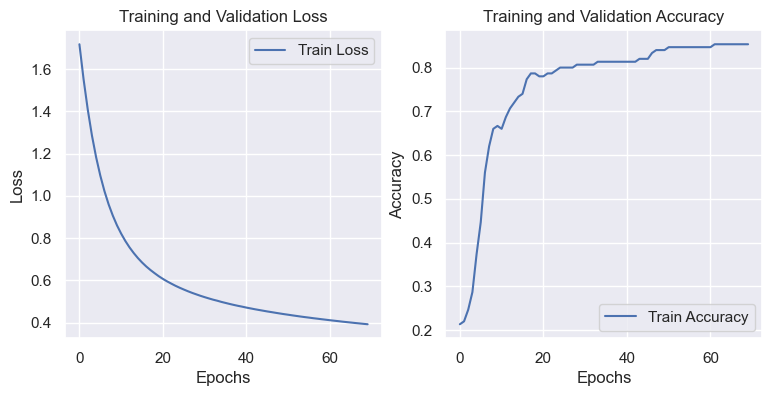

In [32]:
train_loss = history.history['loss']
train_accuracy = history.history['acc']


# Tracé de l'erreur
plt.figure(figsize=(9, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss, label='Train Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

# Tracé de l'eacc
plt.subplot(1, 2, 2)
plt.plot(train_accuracy, label='Train Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [33]:
# Évaluation du modèle avec les données de test
loss, accuracy = model.evaluate(X_IRIS, y_IRIS_encode)
print(f'Loss: {loss}, Accuracy: {accuracy}')

# Faire une prédiction
predictions = model.predict(X_IRIS)

5/5 [==============================] - 0s 4ms/step - loss: 0.3911 - acc: 0.8600
Loss: 0.3911024034023285, Accuracy: 0.8600000143051147
5/5 [==============================] - 0s 2ms/step


Pour notre modèle séquentiel il nous faudra donc différentes méthodes : 
- Add : Cette méthode nous premettra d'ajouter une nouvelle couche au réseau de neurone
- Summary : Cette méthode nous donne tous les renseignements sur le modèle comme le nombre de couches, le nom de chaque couche, le nombre de paramètres du modèle ...
- Get_weights : Cette méthode permet de retourner les poids du modèle.
- Predict : Cette méthode permet a partir de nouvelle données de parcourir tous le réseau par forward propagation pour nous donner une prédiction sur les données. Cette méthode ne doit être utiliser seulement apres l'étape d'apprentrissage.
- Compiler : Cette méthode permet de renseigner des imformations pour l'apprentissage du modèle comme le learning rate ainsi que la fonction de perte à utiliser.
- fit : Cette méthode est le coeur du modèle c'est cette fonction qui fais la forward propagation puis la backward propagation.
- plot_history_acc : Cette méthode permet d'afficher les graphiques d'évolution de l'erreur et de la précision au cours des epochs.
- Add_model : Cette méthode permet de concaténer deux modèles.

In [34]:
from sklearn.metrics import accuracy_score

In [35]:
class Sequential():
    """Class of a Sequential network"""
    def __init__(self, layers = []):
        self.layers = layers
        self.history = {'Loss' : [], 'Acc' : []}
    
    def add(self, layer):
        self.layers.append(layer)

    def add_model(self , model):
        # Tranfere aussi les poids
        for layer in model.layers:
            self.layers.append(layer) 
            
    def summary(self):
        nb_params = 0
        for layer in self.layers:
            if isinstance(layer , Activation) or layer.__class__ == FlattenLayer:
                print(f'{layer.name}()')
            else:
                print(f'{layer.name}() : input shape = {layer.input_size}, output_shape = {layer.output_size}')
                nb_params += layer.weights.shape[0] * layer.weights.shape[1] # ajout du nombre de poids
                if layer.use_bias:
                    nb_params += layer.bias.shape[0] * layer.bias.shape[1]   
        print(f'Le model a {nb_params} paramètres')
                
    def get_weights(self):
        w_dict = {}
        temp = np.arange(0, len(self.layers))
        for layer, i in zip(self.layers, temp):
            if not isinstance(layer , Activation) and not layer.__class__ == FlattenLayer :
                if layer.use_bias:
                    w_dict[f"Layer {i}-{layer.name}"] = {"Weights" : layer.weights, "Bias" : layer.bias}
                else:
                    w_dict[f"Layer {i}-{layer.name}"] = {"Weights" : layer.weights}
        return w_dict
    
    def predict(self,  x_input):
        samples = len(x_input)
        result = []
        for i in range(samples):
            output = x_input[i]
            for layer in self.layers:
                output = layer.forward_propagation(output)
            result.append(output)
        return result
    
    def compiler(self, loss = MSE(), learning_rate = 0.01):
        self.loss = loss
        self.learning_rate = learning_rate
        
    def fit(self, x_train, y_train, epochs = 10, learning_rate = 0.01 ,verbose = True):
        """ x_train must be size : len(x_train), 1, nb_params 
            y_train must be size : len(y_train),  nb_params
            y_train must be encode in one hot"""
        samples = len(x_train)
        
        for epoch in range(epochs):
            error = 0
            y_preds = []
            y_true = []
            for x, y in zip(x_train, y_train):
                
                output = x
                for layer in self.layers:
                    output = layer.forward_propagation(output)
                
                y_preds.append(np.argmax(output))
                y_true.append(np.argmax(y))
                error += self.loss.compute_loss(y, output)
                
                output_gradient = self.loss.compute_loss_grad(y, output)
                
                for layer in reversed(self.layers):
                    output_gradient = layer.backward_propagation(output_gradient, self.learning_rate)
            
            error = error / samples
            acc = accuracy_score(y_true, y_preds)
            self.history['Acc'].append(acc)
            self.history['Loss'].append(error)
            if verbose:
                print(f"{epoch + 1}/{epochs}, error={error :.4f}, acc={acc}")
            
                
    def plot_history_acc(self):
        fig, ax = plt.subplots(1, 2, figsize= (10, 3))
        ax[0].plot(self.history['Loss'])
        ax[1].plot(self.history['Acc'])
        plt.show()

### Ajout de fonctions annexes.

#### Softmax

La fonction softmax transforme un vecteur de nombres réels en un vecteur de probabilités, où chaque élément est dans l'intervalle [0, 1] et la somme de tous les éléments est égale à 1. Cela permet d'interpréter la sortie comme une distribution de probabilités sur différentes classes.

Dans le contexte des réseaux de neurones, la fonction softmax est souvent utilisée sur la couche de sortie pour obtenir des probabilités pour chaque classe dans un problème de classification multiclasses. La classe avec la probabilité la plus élevée est alors généralement choisie comme la prédiction du modèle.

Il est important de noter que la fonction softmax conserve les relations d'ordre entre les éléments du vecteur d'entrée, ce qui signifie que même si elle transforme les valeurs en probabilités, elle conserve l'information sur laquelle des valeurs était initialement plus grande que les autres.

$$\text{softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}$$
$$\frac{\partial \text{softmax}(z)_i}{\partial z_i} = \text{softmax}(z)_i \cdot (1 - \text{softmax}(z)_i)$$

In [36]:
class Softmax(Activation):
    def __init__(self, input_size):
        self.name = "Softmax"
        self.input_size = input_size
        self.output_size = input_size
        
    def forward_propagation(self, x_input):
       # print(x_input.shape)
        tmp = np.exp(x_input)
        self.output = tmp / np.sum(tmp)
        return self.output
    
    def backward_propagation(self, output_gradient, learning_rate):
        n = np.size(self.output)
        M = np.tile(self.output, (n,1))
#         print("output shape : " ,self.output.shape)
#         print("M shape : ", M.shape)
#         print("output gradient shape : ",output_gradient.shape)
#         print((M.T * (np.eye(n) - M)).shape)
        
        return output_gradient @ (M.T * (np.eye(n) - M))

#### Flatten layer

La couche de Flatten est utilisée pour transformer une entrée multidimensionnelle, telle qu'une matrice, en un vecteur plat. Cela est souvent nécessaire lorsqu'on passe d'une couche de convolution à une couche entièrement connectée dans un réseau de neurones convolutif (CNN), car les couches entièrement connectées s'attendent à des entrées unidimensionnelles. Cette fonction nous sera donc utile pour la reconnaissance d'images. En effet, imaginons que nous ayons une image de 28*28 pixels. Pour la faire entrer dans notre réseau qui ne contient pour l'instant que des couches denses, il nous faut aplatir les données. Chaque pixel sera don concidéré comme une variable. Dans cette situation de (28,28) pixel, il nous faudra donc une couche d'entrée composée de $28 \times 28$ neurones. On utilise donc le layer "flatten", qui n'est qu'un reshape.

In [37]:
class FlattenLayer():
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.name = "Flatten"
        self.input_size = input_shape
        self.output_size = "(1, -1)"
        

    def forward_propagation(self, x_input):
        #return np.reshape(x_input, (1, -1))
        self.output = np.reshape(x_input, (1, -1))
        return self.output
    
    def backward_propagation(self, output_error, learning_rate):
        return np.reshape(output_error, self.input_shape)

#### Frontière de décision

La frontière de décision, lorsqu'on travaille dans un contexte bidimensionnel avec deux variables, permet de représenter graphiquement la séparation entre différentes classes. Cela offre une visualisation efficace pour évaluer la capacité de notre modèle à apprendre et à discriminer entre différentes catégories.

In [38]:
def plot_decision_boundary(model, X, y, mesh):
    """ X must be size (len(X), 1, nb params = 2)
        Y must be size (len(Y), 1)"""
    
    x_min, x_max = X[:, :, 0].min() - 0.5, X[:,:,0].max() + 0.5
    y_min, y_max = X[:, :, 1].min() - 0.5, X[:,:, 1].max() + 0.5
    
    # meshgrid
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    
    # predictions
    X_cont = np.c_[xx.ravel(), yy.ravel()].reshape(len(np.c_[xx.ravel(), yy.ravel()]), 1, 2)
    Z = np.array(model.predict(X_cont))
    Z = Z.reshape(Z.shape[0], Z.shape[2])
    
    res = np.array([np.argmax(i) for i in Z])
    res = res.reshape(xx.shape)
    
    X_1 = X.reshape(len(X),2)
    
    # Plot
    plt.contourf(xx, yy, res, cmap=plt.cm.Spectral, alpha=0.8)
    plt.scatter(X_1[:, 0], X_1[:, 1], c=y, cmap=plt.cm.Spectral)
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Decision Boundary Plot')
    plt.show()

# II. Résolution de problèmes classiques de classification

Pour tester nos fonctions et éviter les conflit de noms entre tensorflow et notre modèle nous allons importer nos fonction depuit notre libariarie .

In [39]:
# Scikit learn tools
import sklearn.datasets
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# Tensorflow's tools
import tensorflow as tf
import keras
from keras.utils import np_utils
from keras import layers

# Nos propre fonctions
from Layers import *
from Dense import Dense
from Activations import *
from Losses import *
from Sequential import Sequential
from Tools import *

Afin de faciliter l'évaluation de la performance de nos modèles de classification, nous allons développer une fonction d'évaluation générique qui sera applicable à tous les modèles. Cette fonction nous permettra d'estimer la qualité de nos classifications de manière uniforme, indépendamment du modèle spécifique que nous utilisons.

Cette fonction génère les prédictions du modèle en utilisant la méthode predict. Pour chaque individu, la sortie est représentée sous la forme d'un vecteur qui associe à chaque classe la probabilité que l'individu appartienne à cette classe. Pour déterminer la classe finale, nous utilisons la fonction argmax de NumPy, qui renvoie l'indice de la probabilité maximale. En utilisant la liste complète de toutes les prédictions, nous appliquons ensuite la fonction classification_report de scikit-learn, qui fournit un résumé détaillé de la classification avec différentes mesures. Enfin, la matrice de confusion est affichée avec seaborn.

In [40]:
def eval_modele(Model, X, Y):
    output = Model.predict(X)
    preds = [np.argmax(pred) for pred in output]
    print(classification_report(Y, preds))
    sns.heatmap(confusion_matrix(Y, preds), annot = True, cmap = "coolwarm");

## Classification sur des datasests de tests

Pour commencer nous allons tester nos algorithme sur de très simple problème de classification non linéaire. La classification non linéaire se réfère à la tâche de séparer des données qui ne peuvent pas être correctement classées par une simple ligne ou un plan. Dans ce cas, des frontières de décision plus complexes, telles que des courbes ou des surfaces, sont nécessaires pour séparer efficacement les différentes classes.

**Minsky’s critic (1969)**

**One perceptron cannot learn non-linearly separable functions.**

### Résolution du problème non linéaire du XOR

In [41]:
X_XOR_train = np.array([[[0,0]], [[0,1]], [[1,0]], [[1,1]]])
y_XOR_train = np.array([[0], [1], [1], [0]])

In [42]:
# Encodage avec one hot encoding
y_XOR_encode = np_utils.to_categorical(y_XOR_train)

In [43]:
# Initialisation des couches
net_XOR = [Dense(2,6), # Dense layer 2 entrées (0,1), (1,0), (1,1), (0,0) et 6 neurones
             Tanh(), # Fonction d'activation Tanh à la suite du Dense 
             Dense(6,4), # Dense layer avec 6 entrées en effet le dense précédent compte 6 neurones donc 6 sorties
             Sigmoid(),
             Dense(4, 2), # 2 neurone pour parametre à la couche Softmax de rendre 2 probabilité en fonction de 1 ou 0
             Softmax(2)]

In [44]:
Model_XOR = Sequential(net_XOR)
Model_XOR.summary()

Dense() : input shape = 2, output_shape = 6
Tanh()
Dense() : input shape = 6, output_shape = 4
Sigmoid()
Dense() : input shape = 4, output_shape = 2
Softmax()
Le model a 56 paramètres


Notre modèle possède 56 paramètre à optimiser.

Nous compilons le modèle avec la fonction de perte **binary_cross_entropy** en effet nous souhaitons le classer entre True ou False. Il y donc que deux classes.

In [45]:
Model_XOR.compiler(loss= binary_cross_entropy(), learning_rate= 0.1)
Model_XOR.fit(X_XOR_train, y_XOR_encode, epochs=500, verbose=True)

1/500, error=0.7539, acc=0.5
2/500, error=0.7500, acc=0.25
3/500, error=0.7484, acc=0.25
4/500, error=0.7477, acc=0.25
5/500, error=0.7473, acc=0.5
6/500, error=0.7471, acc=0.5
7/500, error=0.7469, acc=0.5
8/500, error=0.7468, acc=0.5
9/500, error=0.7466, acc=0.5
10/500, error=0.7465, acc=0.5
11/500, error=0.7464, acc=0.5
12/500, error=0.7463, acc=0.5
13/500, error=0.7461, acc=0.5
14/500, error=0.7460, acc=0.5
15/500, error=0.7459, acc=0.5
16/500, error=0.7457, acc=0.5
17/500, error=0.7456, acc=0.5
18/500, error=0.7455, acc=0.5
19/500, error=0.7453, acc=0.5
20/500, error=0.7452, acc=0.5
21/500, error=0.7451, acc=0.5
22/500, error=0.7449, acc=0.5
23/500, error=0.7448, acc=0.5
24/500, error=0.7447, acc=0.5
25/500, error=0.7445, acc=0.5
26/500, error=0.7444, acc=0.5
27/500, error=0.7442, acc=0.5
28/500, error=0.7441, acc=0.5
29/500, error=0.7439, acc=0.5
30/500, error=0.7438, acc=0.5
31/500, error=0.7437, acc=0.5
32/500, error=0.7435, acc=0.5
33/500, error=0.7434, acc=0.5
34/500, error=0.

Voici l'évolution de la fonction de perte ainsi que celle de l'accuracy en fonction des epochs. Nous pouvons observer que le modèle apprend bien, en effet nous observons que : 
- l'erreur chute et tend vers 0
- la précision augmente et tend vers 1.

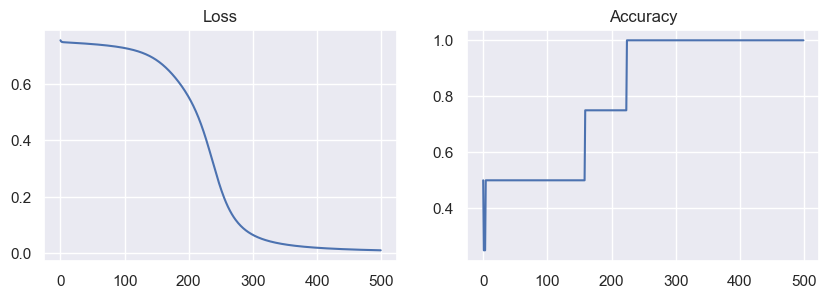

In [46]:
Model_XOR.plot_history_acc()

Après la prédiction nous observons qu'a chaque fois la probabilité pour le choix de la classe est très élevée proche de 1.

In [47]:
XOR_output = Model_XOR.predict(X_XOR_train)
print(XOR_output)

[array([[0.9933419, 0.0066581]]), array([[0.00988122, 0.99011878]]), array([[0.0124313, 0.9875687]]), array([[0.98737439, 0.01262561]])]


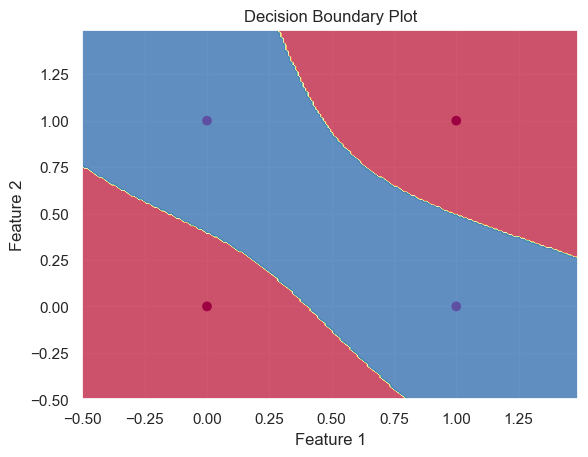

In [48]:
plot_decision_boundary(Model_XOR, X_XOR_train, y_XOR_train, 0.01)

### Résolution du problème non linéaire de make moons

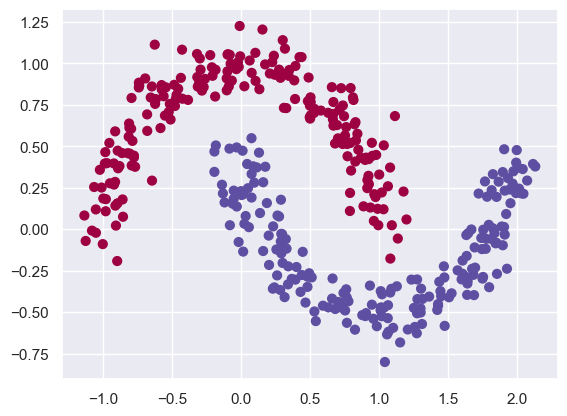

In [49]:
np.random.seed(0)
X_MOON, y_MOON = sklearn.datasets.make_moons(500, noise=0.10)
X_MOON_train, X_MOON_test, y_MOON_train, y_MOON_test = train_test_split(X_MOON, y_MOON, test_size=0.2, random_state=42)
plt.scatter(X_MOON_train[:,0], X_MOON_train[:,1], s=40, c=y_MOON_train, cmap=plt.cm.Spectral);

Nous observons que les deux classes ne sont pas linéairement séparable. C'est donc bien un problème non linéaire.

In [50]:
y_MOON_encode = np_utils.to_categorical(y_MOON_train)
net_MOON = [
    Dense(2, 4),
    Relu(),
    Dense(4, 8),
    Relu(),
    Dense(8, 5),
    Relu(),
    Dense(5, 2),
    Softmax(2)
] 
Model_MOON = Sequential(net_MOON)
Model_MOON.summary()

Dense() : input shape = 2, output_shape = 4
Relu()
Dense() : input shape = 4, output_shape = 8
Relu()
Dense() : input shape = 8, output_shape = 5
Relu()
Dense() : input shape = 5, output_shape = 2
Softmax()
Le model a 109 paramètres


In [51]:
Model_MOON.compiler(loss= MSE())
Model_MOON.fit(X_MOON_train.reshape(len(X_MOON_train), 1, 2), y_MOON_encode, epochs = 200, learning_rate=0.2)

1/200, error=0.2505, acc=0.49
2/200, error=0.2466, acc=0.6425
3/200, error=0.2399, acc=0.72
4/200, error=0.2244, acc=0.765
5/200, error=0.1919, acc=0.8
6/200, error=0.1520, acc=0.825
7/200, error=0.1234, acc=0.8525
8/200, error=0.1057, acc=0.8675
9/200, error=0.0961, acc=0.875
10/200, error=0.0909, acc=0.88
11/200, error=0.0881, acc=0.8825
12/200, error=0.0862, acc=0.8875
13/200, error=0.0849, acc=0.89
14/200, error=0.0838, acc=0.8925
15/200, error=0.0829, acc=0.8925
16/200, error=0.0821, acc=0.9
17/200, error=0.0813, acc=0.8975
18/200, error=0.0807, acc=0.895
19/200, error=0.0802, acc=0.8975
20/200, error=0.0797, acc=0.8975
21/200, error=0.0792, acc=0.895
22/200, error=0.0788, acc=0.895
23/200, error=0.0785, acc=0.895
24/200, error=0.0782, acc=0.8975
25/200, error=0.0779, acc=0.895
26/200, error=0.0777, acc=0.895
27/200, error=0.0774, acc=0.895
28/200, error=0.0772, acc=0.895
29/200, error=0.0770, acc=0.895
30/200, error=0.0767, acc=0.895
31/200, error=0.0764, acc=0.8975
32/200, error

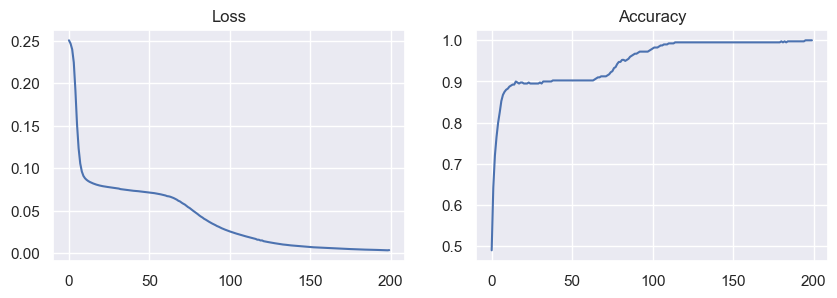

In [52]:
Model_MOON.plot_history_acc()

De la même manière que dans le problème précédent, on constate clairement que le modèle apprend correctement grâce aux courbes d'apprentissage ci-dessus.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       200
           1       1.00      1.00      1.00       200

    accuracy                           1.00       400
   macro avg       1.00      1.00      1.00       400
weighted avg       1.00      1.00      1.00       400



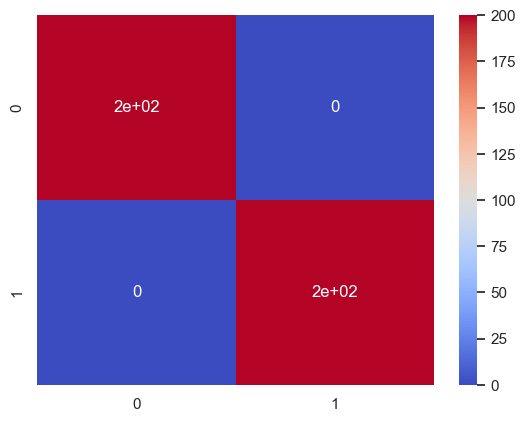

In [53]:
eval_modele(Model_MOON,  X_MOON_train, y_MOON_train)

L'observation indique que le modèle ne commet aucune erreur sur l'ensemble d'entraînement. Toutefois, il est crucial de vérifier ses performances sur de nouvelles données. En effet, il n'est pas judicieux de tester le modèle sur des données déjà rencontrées pendant l'entraînement, car cela ne fournit pas une évaluation robuste de sa capacité à généraliser à de nouveaux exemples.

Un des problèmes majeurs lors de l'apprentissage est l'overfitting. Il s'agit d'une situation où un modèle s'adapte excessivement aux données d'entraînement, allant jusqu'à capturer le bruit et les fluctuations aléatoires présents dans ces données. En conséquence, le modèle affiche des performances élevées sur les données d'entraînement, mais il éprouve des difficultés à généraliser correctement à de nouvelles données qu'il n'a pas encore rencontrées.

La détection de ce problème se fait notamment en analysant les performances du modèle sur les données d'entraînement ainsi que sur de nouvelles données de test. En effet, une performance exceptionnelle sur les données d'entraînement, comuci-dessusnt, combinée à de mauvaises performances sur les données de test, peut être un indicateur'overfittingnt. C'est pourquoi il est crucial d'évaluer la capacité du modèle à généraliser à des exemples non vus afin d'assurer une performance robuste dans des situations réelles.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



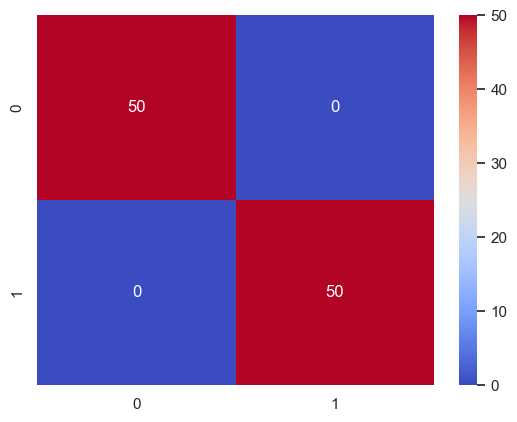

In [54]:
eval_modele(Model_MOON,  X_MOON_test, y_MOON_test)

- Recall:
Le Recall mesure la capacité d'un modèle à identifier tous les exemples positifs réels dans un ensemble de données.
Il est défini comme le nombre d'exemples positifs correctement identifiés par le modèle (vrais positifs) divisé par le nombre total d'exemples positifs réels (vrais positifs + faux négatifs).
Le rappel est important dans des situations où manquer un exemple positif est coûteux, et on veut minimiser les faux négatifs.
Un des exemple marquant de l'utilisation du Recall est la détaction du Cancer du seins. En effet il est moins graphe de détecter un cancer quand il n'y en pas que de ne pas le détecter quand il y en a un.

- La mesure F1 est une moyenne harmonique entre la précision et le recall. Elle fournit un équilibre entre la précision et le recall.La précision mesure la capacité du modèle à ne pas étiqueter à tort les exemples négatifs comme positifs. Le recall mesure la capacité à identifier tous les exemples positifs réels.
La mesure F1 atteint sa valeur maximale de 1 lorsque la précision et le rappel sont tous deux égaux à 1.

$$\text{Recall} = \frac{\text{Vrais Positifs}}{\text{Vrais Positifs} + \text{Faux Négatifs}} \hspace{5cm} \text{F1} = 2 \times \frac{\text{Précision} \times \text{Recall}}{\text{Précision} + \text{Recall}}$$

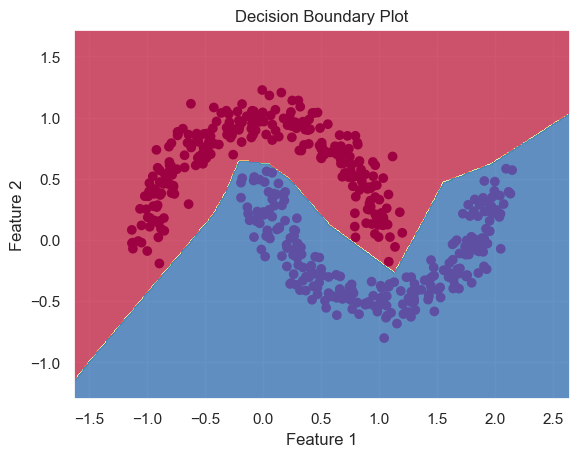

In [55]:
plot_decision_boundary(Model_MOON, X_MOON.reshape(len(X_MOON), 1, 2), y_MOON, 0.01)

### Résolution du problème Circles

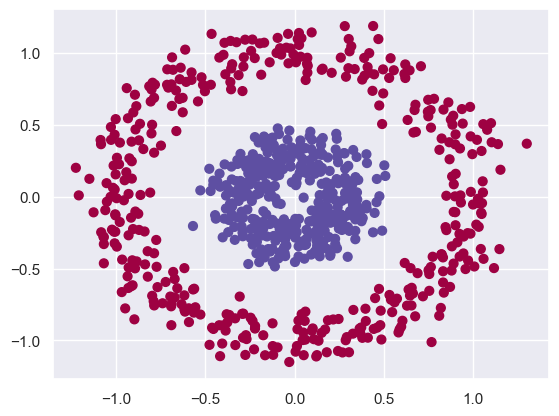

In [56]:
np.random.seed(0)
X_CIRCLE_1, y_CIRCLE_1 = sklearn.datasets.make_circles(n_samples=1000, factor=0.3, noise=0.1, random_state=0)
X_CIRCLE_1_train, X_CIRCLE_1_test, y_CIRCLE_1_train, y_CIRCLE_1_test = train_test_split(X_CIRCLE_1, y_CIRCLE_1, test_size=0.2, random_state=42)
plt.scatter(X_CIRCLE_1_train[:,0], X_CIRCLE_1_train[:,1], s=40, c=y_CIRCLE_1_train, cmap=plt.cm.Spectral);

In [57]:
y_CIRCLE_1_encode = np_utils.to_categorical(y_CIRCLE_1_train)
net_CIRCLE_1 = [
    Dense(2, 4),
    Relu(),
    Dense(4, 8),
    Relu(),
    Dense(8, 5),
    Relu(),
    Dense(5, 2),
    Softmax(2)
] 
Model_CIRCLE_1 = Sequential(net_CIRCLE_1)
Model_CIRCLE_1.summary()

Dense() : input shape = 2, output_shape = 4
Relu()
Dense() : input shape = 4, output_shape = 8
Relu()
Dense() : input shape = 8, output_shape = 5
Relu()
Dense() : input shape = 5, output_shape = 2
Softmax()
Le model a 109 paramètres


In [58]:
Model_CIRCLE_1.compiler(loss= binary_cross_entropy())
Model_CIRCLE_1.fit(X_CIRCLE_1_train.reshape(len(X_CIRCLE_1_train), 1, 2), y_CIRCLE_1_encode, epochs=60, learning_rate=0.2)

1/60, error=0.6814, acc=0.55125
2/60, error=0.6230, acc=0.64625
3/60, error=0.5549, acc=0.7175
4/60, error=0.3740, acc=0.8725
5/60, error=0.1111, acc=0.9975
6/60, error=0.0414, acc=0.99625
7/60, error=0.0224, acc=0.99875
8/60, error=0.0149, acc=0.99875
9/60, error=0.0111, acc=0.99875
10/60, error=0.0088, acc=1.0
11/60, error=0.0073, acc=1.0
12/60, error=0.0061, acc=1.0
13/60, error=0.0053, acc=1.0
14/60, error=0.0047, acc=1.0
15/60, error=0.0043, acc=1.0
16/60, error=0.0039, acc=1.0
17/60, error=0.0037, acc=1.0
18/60, error=0.0034, acc=1.0
19/60, error=0.0032, acc=1.0
20/60, error=0.0030, acc=1.0
21/60, error=0.0029, acc=1.0
22/60, error=0.0027, acc=1.0
23/60, error=0.0026, acc=1.0
24/60, error=0.0025, acc=1.0
25/60, error=0.0024, acc=1.0
26/60, error=0.0023, acc=1.0
27/60, error=0.0022, acc=1.0
28/60, error=0.0021, acc=1.0
29/60, error=0.0020, acc=1.0
30/60, error=0.0019, acc=1.0
31/60, error=0.0019, acc=1.0
32/60, error=0.0018, acc=1.0
33/60, error=0.0017, acc=1.0
34/60, error=0.0017

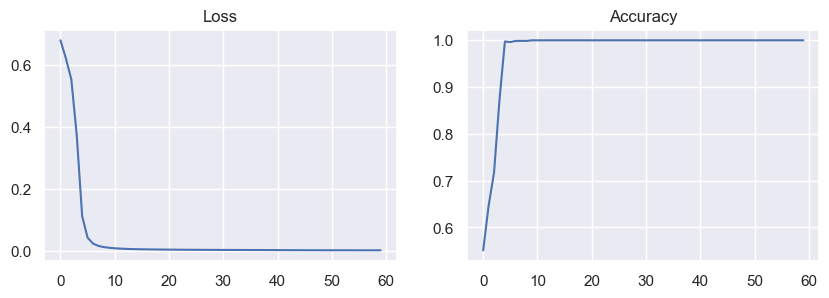

In [59]:
Model_CIRCLE_1.plot_history_acc()

Le modèle converge très vite vers une précision de 1

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        94
           1       1.00      1.00      1.00       106

    accuracy                           1.00       200
   macro avg       1.00      1.00      1.00       200
weighted avg       1.00      1.00      1.00       200



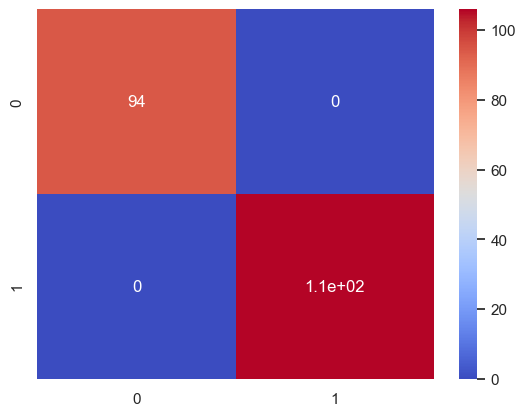

In [60]:
eval_modele(Model_CIRCLE_1,  X_CIRCLE_1_test, y_CIRCLE_1_test)

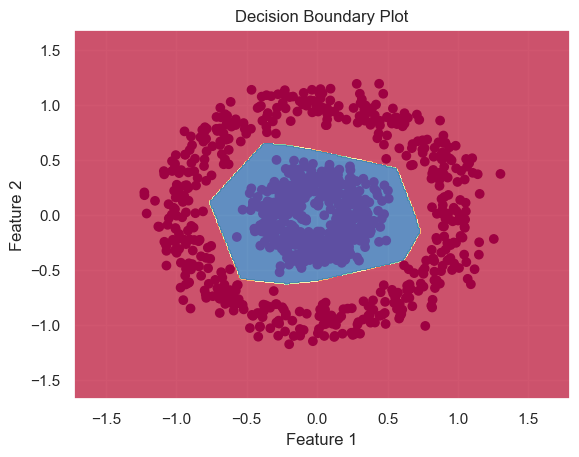

In [61]:
plot_decision_boundary(Model_CIRCLE_1, X_CIRCLE_1.reshape(len(X_CIRCLE_1), 1, 2), y_CIRCLE_1, mesh = 0.01)

Nous allons classer des classes qui sont moins distinctes, ce qui rendra donc plus difficile de les différencier.

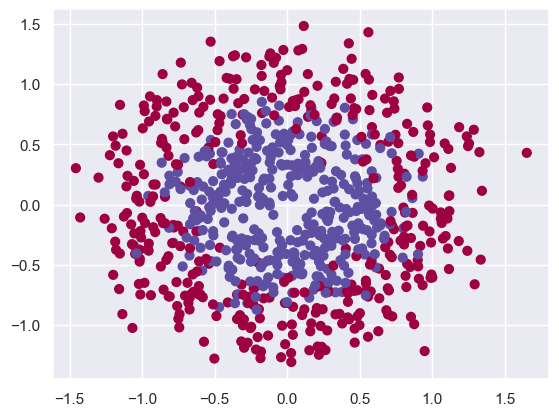

In [62]:
np.random.seed(0)
X_CIRCLE_2, y_CIRCLE_2 = sklearn.datasets.make_circles(n_samples=1000, factor=0.5, noise=0.2, random_state=0)
X_CIRCLE_2_train, X_CIRCLE_2_test, y_CIRCLE_2_train, y_CIRCLE_2_test = train_test_split(X_CIRCLE_2, y_CIRCLE_2, test_size=0.2, random_state=42)
plt.scatter(X_CIRCLE_2_train[:,0], X_CIRCLE_2_train[:,1], s=40, c=y_CIRCLE_1_train, cmap=plt.cm.Spectral);

In [63]:
y_CIRCLE_2_encode = np_utils.to_categorical(y_CIRCLE_2_train)
net_CIRCLE_2 = [
    Dense(2, 4),
    Relu(),
    Dense(4, 8),
    Relu(),
    Dense(8, 5),
    Relu(),
    Dense(5, 2),
    Softmax(2)
] 
Model_CIRCLE_2 = Sequential(net_CIRCLE_2)
Model_CIRCLE_2.summary()
Model_CIRCLE_2.compiler(loss= binary_cross_entropy())
Model_CIRCLE_2.fit(X_CIRCLE_2_train.reshape(len(X_CIRCLE_2_train), 1, 2), y_CIRCLE_2_encode, epochs=60, learning_rate=0.1)

Dense() : input shape = 2, output_shape = 4
Relu()
Dense() : input shape = 4, output_shape = 8
Relu()
Dense() : input shape = 8, output_shape = 5
Relu()
Dense() : input shape = 5, output_shape = 2
Softmax()
Le model a 109 paramètres
1/60, error=0.6956, acc=0.52375
2/60, error=0.6789, acc=0.5525
3/60, error=0.6649, acc=0.58625
4/60, error=0.6530, acc=0.605
5/60, error=0.6399, acc=0.6225
6/60, error=0.6155, acc=0.6625
7/60, error=0.5754, acc=0.70375
8/60, error=0.5501, acc=0.7225
9/60, error=0.5329, acc=0.74
10/60, error=0.5195, acc=0.7425
11/60, error=0.4947, acc=0.76
12/60, error=0.4213, acc=0.80875
13/60, error=0.3601, acc=0.84875
14/60, error=0.3487, acc=0.85
15/60, error=0.3427, acc=0.8475
16/60, error=0.3372, acc=0.8425
17/60, error=0.3335, acc=0.84375
18/60, error=0.3302, acc=0.8475
19/60, error=0.3276, acc=0.85
20/60, error=0.3241, acc=0.8525
21/60, error=0.3225, acc=0.85375
22/60, error=0.3217, acc=0.8575
23/60, error=0.3198, acc=0.8575
24/60, error=0.3185, acc=0.8575
25/60, err

              precision    recall  f1-score   support

           0       0.89      0.90      0.90        94
           1       0.91      0.91      0.91       106

    accuracy                           0.91       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.91      0.91      0.91       200



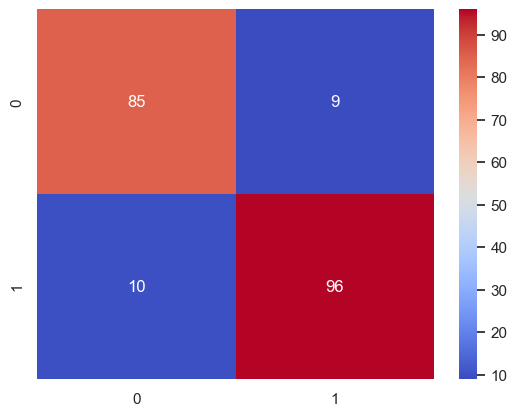

In [64]:
eval_modele(Model_CIRCLE_2,  X_CIRCLE_2_test, y_CIRCLE_2_test)

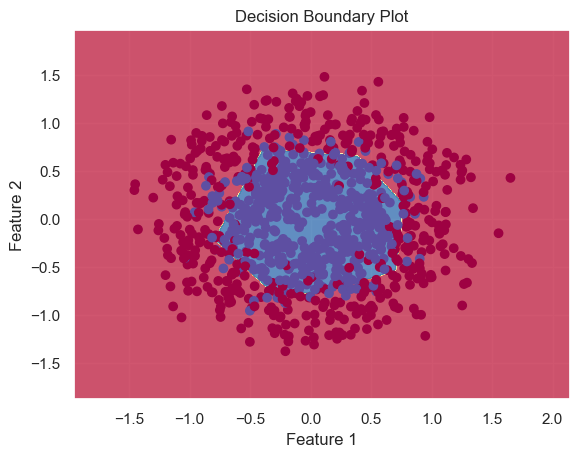

In [65]:
plot_decision_boundary(Model_CIRCLE_2, X_CIRCLE_2.reshape(len(X_CIRCLE_2), 1, 2), y_CIRCLE_2, mesh = 0.01)

### Ajoutons des classes

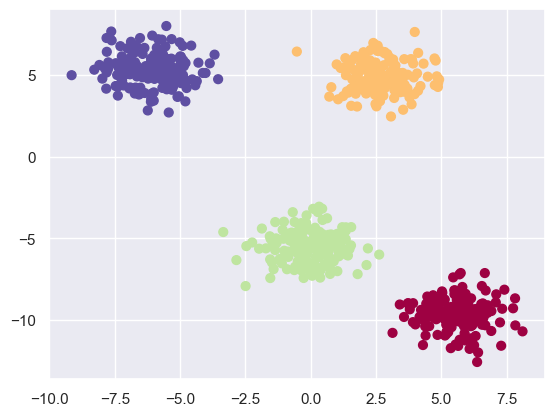

In [66]:
np.random.seed(0)
X_BLOB1, y_BLOB1 = sklearn.datasets.make_blobs(n_samples=800, n_features=2, centers=4, random_state=10)
X_BLOB1_train, X_BLOB1_test, y_BLOB1_train, y_BLOB1_test = train_test_split(X_BLOB1, y_BLOB1, test_size=0.2, random_state=42)
plt.scatter(X_BLOB1_train[:,0], X_BLOB1_train[:,1], s=40, c=y_BLOB1_train, cmap=plt.cm.Spectral);

Nous allons utiliser la fonction de perte Categorical Cross Entropy en effet nous avons ici 4 classes

1/60, error=0.2527, acc=0.6984375
2/60, error=0.1370, acc=0.96875
3/60, error=0.0847, acc=0.990625
4/60, error=0.0576, acc=0.99375
5/60, error=0.0412, acc=0.99375
6/60, error=0.0304, acc=0.99375
7/60, error=0.0230, acc=0.99375
8/60, error=0.0179, acc=0.99375
9/60, error=0.0143, acc=0.99375
10/60, error=0.0117, acc=0.996875
11/60, error=0.0099, acc=0.996875
12/60, error=0.0085, acc=0.996875
13/60, error=0.0074, acc=0.9984375
14/60, error=0.0066, acc=0.9984375
15/60, error=0.0059, acc=0.9984375
16/60, error=0.0053, acc=0.9984375
17/60, error=0.0049, acc=0.9984375
18/60, error=0.0045, acc=0.9984375
19/60, error=0.0042, acc=0.9984375
20/60, error=0.0039, acc=0.9984375
21/60, error=0.0037, acc=0.9984375
22/60, error=0.0035, acc=0.9984375
23/60, error=0.0033, acc=0.9984375
24/60, error=0.0031, acc=0.9984375
25/60, error=0.0030, acc=0.9984375
26/60, error=0.0029, acc=0.9984375
27/60, error=0.0028, acc=0.9984375
28/60, error=0.0027, acc=0.9984375
29/60, error=0.0026, acc=0.9984375
30/60, error

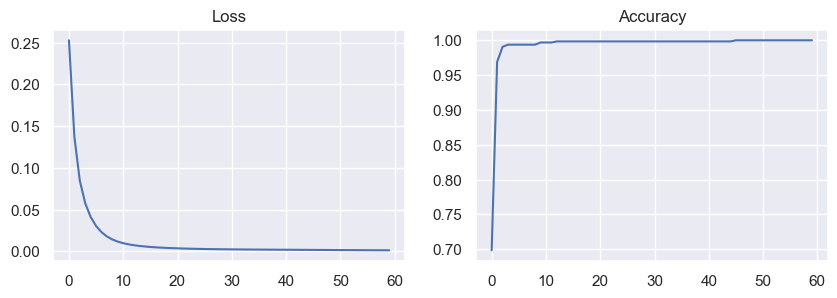

In [67]:
y_BLOB1_encode = np_utils.to_categorical(y_BLOB1_train)
net_BLOB1 = [
    Dense(2, 4),
    Relu(),
    Dense(4, 8),
    Relu(),
    Dense(8, 6),
    Relu(),
    Dense(6, 4),
    Softmax(4)
] 
Model_BLOB1 = Sequential(net_BLOB1)
Model_BLOB1.compiler(loss= CategoricalCrossentropy())
Model_BLOB1.fit(X_BLOB1_train.reshape(len(X_BLOB1_train), 1, 2), y_BLOB1_encode, epochs=60, learning_rate=0.2)
Model_BLOB1.plot_history_acc()

In [68]:
Model_BLOB1.summary()

Dense() : input shape = 2, output_shape = 4
Relu()
Dense() : input shape = 4, output_shape = 8
Relu()
Dense() : input shape = 8, output_shape = 6
Relu()
Dense() : input shape = 6, output_shape = 4
Softmax()
Le model a 134 paramètres


              precision    recall  f1-score   support

           0       1.00      0.98      0.99        42
           1       1.00      1.00      1.00        48
           2       0.97      1.00      0.99        33
           3       1.00      1.00      1.00        37

    accuracy                           0.99       160
   macro avg       0.99      0.99      0.99       160
weighted avg       0.99      0.99      0.99       160



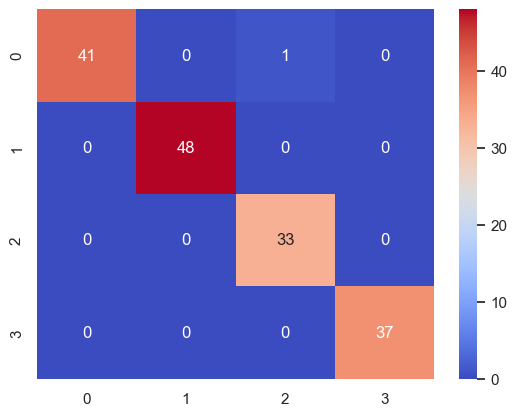

In [69]:
eval_modele(Model_BLOB1,  X_BLOB1_test, y_BLOB1_test)

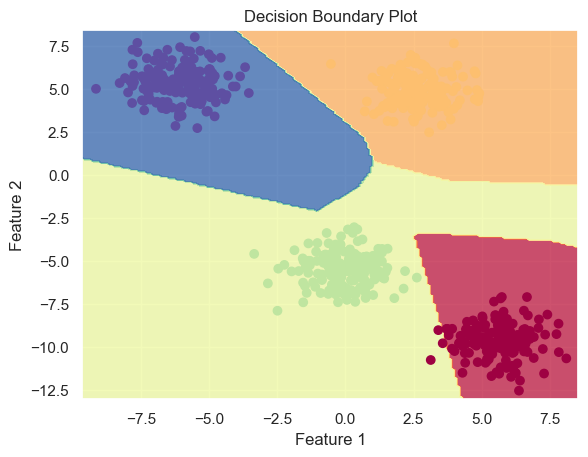

In [70]:
plot_decision_boundary(Model_BLOB1, (X_BLOB1_train.reshape(len(X_BLOB1_train), 1, 2)), y_BLOB1_train, mesh = 0.1)

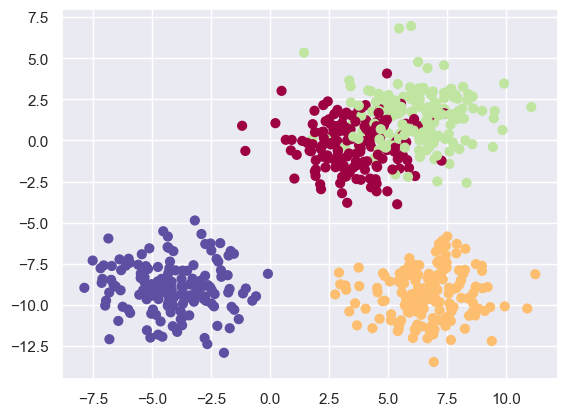

In [71]:
np.random.seed(0)
X_BLOB2, y_BLOB2 = sklearn.datasets.make_blobs(n_samples=800, n_features=2, centers=4, random_state=99,cluster_std= 1.5)
X_BLOB2_train, X_BLOB2_test, y_BLOB2_train, y_BLOB2_test = train_test_split(X_BLOB2, y_BLOB2, test_size=0.2, random_state=42)
plt.scatter(X_BLOB2_train[:,0], X_BLOB2_train[:,1], s=40, c=y_BLOB2_train, cmap=plt.cm.Spectral);

1/60, error=0.2994, acc=0.390625
2/60, error=0.2189, acc=0.709375
3/60, error=0.1416, acc=0.7921875
4/60, error=0.0976, acc=0.8234375
5/60, error=0.0852, acc=0.8375
6/60, error=0.0804, acc=0.840625
7/60, error=0.0776, acc=0.8390625
8/60, error=0.0756, acc=0.840625
9/60, error=0.0739, acc=0.8453125
10/60, error=0.0722, acc=0.853125
11/60, error=0.0708, acc=0.853125
12/60, error=0.0696, acc=0.8609375
13/60, error=0.0683, acc=0.8640625
14/60, error=0.0672, acc=0.875
15/60, error=0.0662, acc=0.875
16/60, error=0.0653, acc=0.878125
17/60, error=0.0645, acc=0.8796875
18/60, error=0.0636, acc=0.884375
19/60, error=0.0629, acc=0.890625
20/60, error=0.0618, acc=0.8953125
21/60, error=0.0610, acc=0.8984375
22/60, error=0.0602, acc=0.9
23/60, error=0.0596, acc=0.9046875
24/60, error=0.0590, acc=0.9078125
25/60, error=0.0585, acc=0.9078125
26/60, error=0.0579, acc=0.9046875
27/60, error=0.0573, acc=0.9046875
28/60, error=0.0568, acc=0.90625
29/60, error=0.0563, acc=0.9046875
30/60, error=0.0559, a

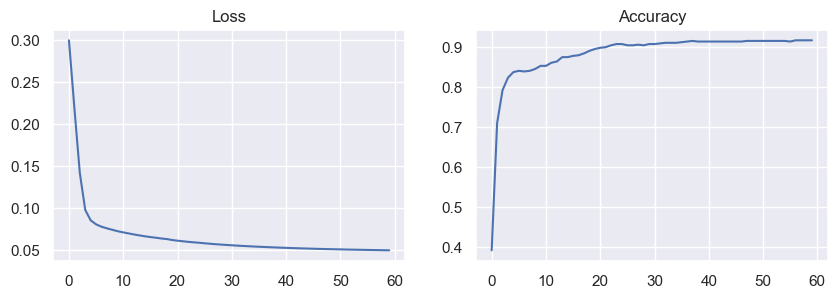

In [72]:
y_BLOB2_encode = np_utils.to_categorical(y_BLOB2_train)
net_BLOB2 = [
    Dense(2, 4),
    Relu(),
    Dense(4, 8),
    Relu(),
    Dense(8, 6),
    Relu(),
    Dense(6, 4),
    Softmax(4)
] 
Model_BLOB2 = Sequential(net_BLOB2)
Model_BLOB2.compiler(loss= CategoricalCrossentropy())
Model_BLOB2.fit(X_BLOB2_train.reshape(len(X_BLOB2_train), 1, 2), y_BLOB2_encode, epochs=60, learning_rate=0.2)
Model_BLOB2.plot_history_acc()

Nous perdons énormément en précision.

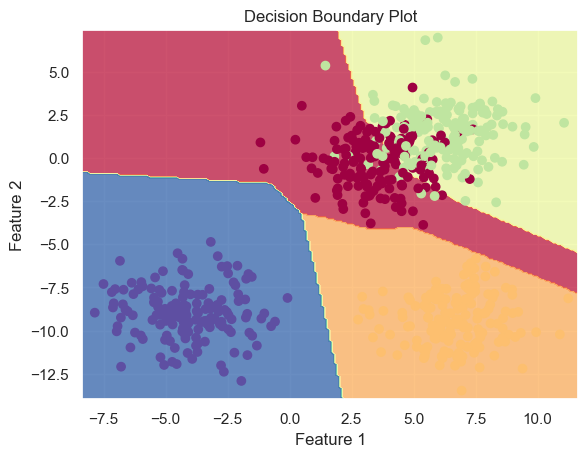

In [73]:
plot_decision_boundary(Model_BLOB2, (X_BLOB2_train.reshape(len(X_BLOB2_train), 1, 2)), y_BLOB2_train, mesh = 0.1)

## Classification sur des datasets plus réalistent et comparaison de performances avec Tensorflow

In [74]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

### IRIS Data set

In [75]:
iris = sklearn.datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target

X_IRIS, y_IRIS = iris.data, iris.target

scaler = StandardScaler()
X_IRIS = scaler.fit_transform(X_IRIS)
X_IRIS_train, X_IRIS_test, y_IRIS_train, y_IRIS_test = train_test_split(X_IRIS, y_IRIS, test_size=0.2, random_state=42)
print(X_IRIS.shape)
print(y_IRIS.shape)

(150, 4)
(150,)


In [76]:
iris_df.head()

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   target  
0       0  
1       0  
2       0  
3       0  
4       0

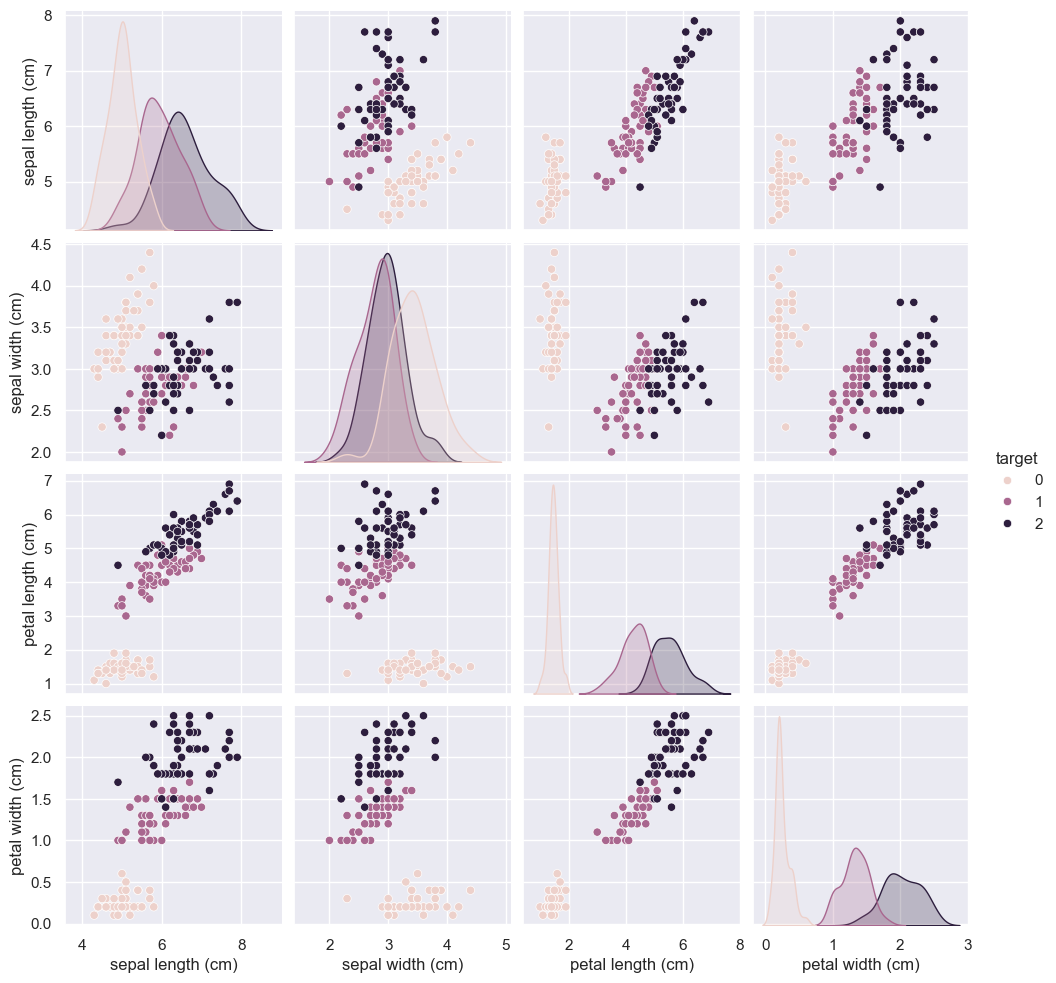

In [77]:
sns.pairplot(iris_df, hue='target')

Nous pouvons observer que la classe 0 se détache bien des deux autres classes, nous n'aurons donc pas de problème avec celle ci. Les deux autres classes sont beaucoup moins distinctes on aura donc une perte de précision sur la séparation entre les classes 1 et 2.

#### Notre model

In [88]:
y_IRIS_encode = np_utils.to_categorical(y_IRIS_train)
net_IRIS = [
    Dense(4, 10),
    Relu(),
    Dense(10, 3),
    Softmax(3)
] 
Model_IRIS = Sequential(net_IRIS)
Model_IRIS.compiler(loss= CategoricalCrossentropy())
Model_IRIS.fit(X_IRIS_train.reshape(len(X_IRIS_train), 1, 4), y_IRIS_encode, epochs=150, learning_rate=0.5)

1/150, error=0.3593, acc=0.35833333333333334
2/150, error=0.3372, acc=0.4583333333333333
3/150, error=0.3151, acc=0.5416666666666666
4/150, error=0.2920, acc=0.6416666666666667
5/150, error=0.2692, acc=0.6833333333333333
6/150, error=0.2478, acc=0.7833333333333333
7/150, error=0.2291, acc=0.8083333333333333
8/150, error=0.2132, acc=0.8166666666666667
9/150, error=0.1997, acc=0.825
10/150, error=0.1874, acc=0.8166666666666667
11/150, error=0.1763, acc=0.8083333333333333
12/150, error=0.1667, acc=0.8333333333333334
13/150, error=0.1581, acc=0.85
14/150, error=0.1504, acc=0.85
15/150, error=0.1435, acc=0.85
16/150, error=0.1374, acc=0.8583333333333333
17/150, error=0.1319, acc=0.875
18/150, error=0.1268, acc=0.875
19/150, error=0.1222, acc=0.875
20/150, error=0.1180, acc=0.875
21/150, error=0.1140, acc=0.875
22/150, error=0.1104, acc=0.875
23/150, error=0.1070, acc=0.8833333333333333
24/150, error=0.1038, acc=0.8916666666666667
25/150, error=0.1006, acc=0.9083333333333333
26/150, error=0.

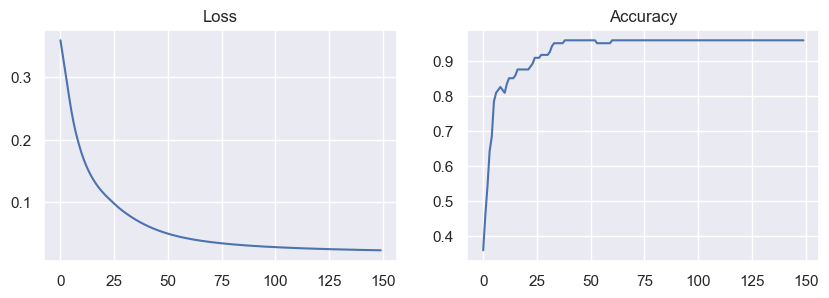

In [89]:
Model_IRIS.plot_history_acc()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.95      0.96        41
           2       0.95      0.97      0.96        39

    accuracy                           0.97       120
   macro avg       0.97      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



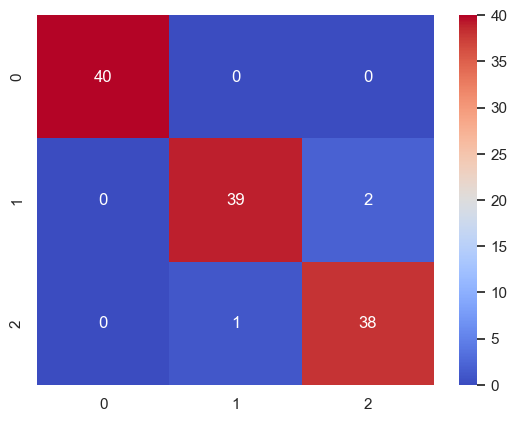

In [90]:
eval_modele(Model_IRIS,  X_IRIS_train, y_IRIS_train)

Sur le trainset nous avons une précision de 98%. Nous devons maintenant test sur le testset pour vérifier la capacité de généralisation de notre modèle.

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



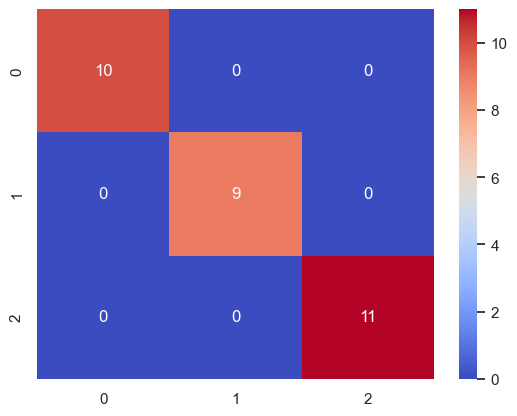

In [91]:
eval_modele(Model_IRIS,  X_IRIS_test, y_IRIS_test)

Nous observons une précision de 100 % sur l'ensemble de test. Notre modèle fonctionne donc correctement et parvient à généraliser efficacement.

Effectuons une prédiction pour un nouvel individu.

In [92]:
nouvel_iris = np.array([6, 4, 3, 2]).reshape(1, 4)
nouvel_iris = scaler.transform(nouvel_iris)
Model_IRIS.predict(nouvel_iris)

[array([[0.11283251, 0.82489256, 0.06227494]])]

In [93]:
classe_nouvel_individu = np.argmax(Model_IRIS.predict(nouvel_iris.reshape(1, 4)))
classe_nouvel_individu

1

#### Tensorflow 

In [94]:
model_IRIS_tf = keras.Sequential([
    layers.Dense(10, activation="relu"),
    layers.Dense(3, activation="softmax"),
])

optimizer = keras.optimizers.SGD(learning_rate=0.1)
model_IRIS_tf.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_history = model_IRIS_tf.fit(X_IRIS_train, y_IRIS_train, epochs=100)

Epoch 1/100
4/4 [==============================] - 1s 5ms/step - loss: 1.2325 - accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8504 - accuracy: 0.6000
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7025 - accuracy: 0.7167
Epoch 4/100
4/4 [==============================] - 0s 3ms/step - loss: 0.6174 - accuracy: 0.7500
Epoch 5/100
4/4 [==============================] - 0s 0s/step - loss: 0.5593 - accuracy: 0.8000
Epoch 6/100
4/4 [==============================] - 0s 3ms/step - loss: 0.5188 - accuracy: 0.8417
Epoch 7/100
4/4 [==============================] - 0s 1ms/step - loss: 0.4837 - accuracy: 0.8250
Epoch 8/100
4/4 [==============================] - 0s 3ms/step - loss: 0.4578 - accuracy: 0.8417
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4386 - accuracy: 0.8417
Epoch 10/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4162 - accuracy: 0.8333
Epoch 11/100
4/4 [============

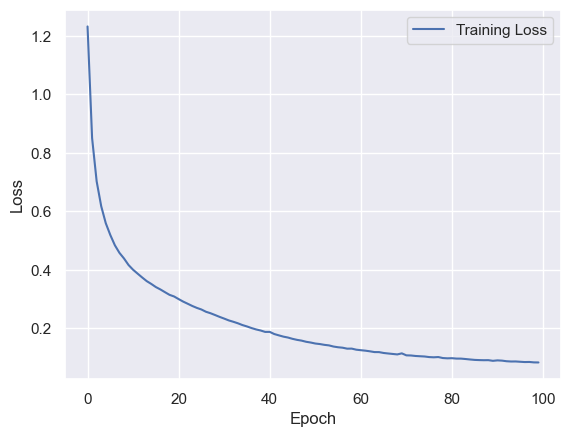

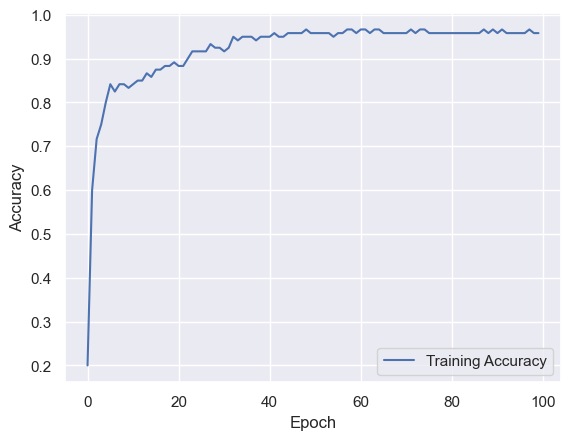

In [95]:
plt.plot(model_history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 [==============================] - 0s 6ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        40
           1       0.97      0.90      0.94        41
           2       0.90      0.97      0.94        39

    accuracy                           0.96       120
   macro avg       0.96      0.96      0.96       120
weighted avg       0.96      0.96      0.96       120



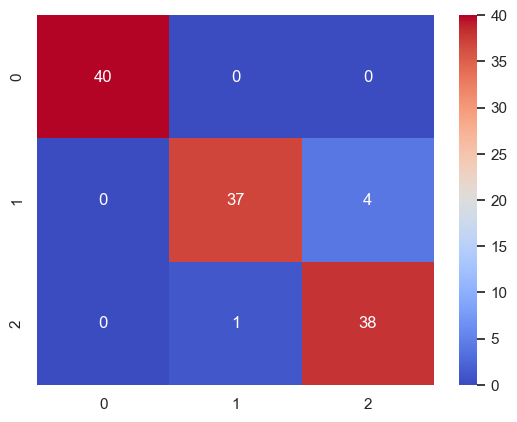

In [86]:
eval_modele(model_IRIS_tf,  X_IRIS_train, y_IRIS_train)

1/1 [==============================] - 0s 70ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



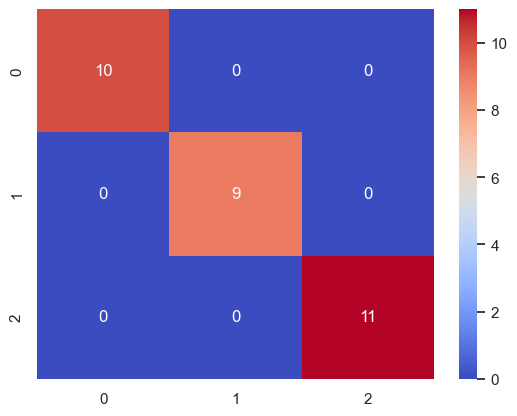

In [96]:
eval_modele(model_IRIS_tf,  X_IRIS_test, y_IRIS_test)

### Breast Cancer Dataset

In [97]:
cancer = sklearn.datasets.load_breast_cancer()

cancer_df = pd.DataFrame(data=cancer.data, columns=cancer.feature_names)
cancer_df['target'] = cancer.target

X_CANCER, y_CANCER = cancer.data, cancer.target

scaler = StandardScaler()
X_CANCER = scaler.fit_transform(X_CANCER)
X_CANCER_train, X_CANCER_test, y_CANCER_train, y_CANCER_test = train_test_split(X_CANCER, y_CANCER, test_size=0.2, random_state=42)

# Vérifier la forme des ensembles d'entraînement et de test
print("Shape of X_train:", X_CANCER_train.shape)
print("Shape of X_test:", X_CANCER_test.shape)

Shape of X_train: (455, 30)
Shape of X_test: (114, 30)


In [98]:
cancer_df.head()

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   mean compactness  mean concavity  mean concave points  mean symmetry  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   mean fractal dimension  ...  worst texture  worst perimeter  worst area  \
0                 0.07871  ...          17.33           184.60      2019.0   
1                 0.05667  ...          23.41           158.80      1956.0   
2                 0.05999  ...          25.53           152.50      1709.0   
3                 0.09744  ...          26.50            98.87       567.7   
4                 0.05883  ...          16.67           152.20      1575.0   

   worst smoothness  worst compactness  worst concavity  worst concave points  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   worst symmetry  worst fractal dimension  target  
0          0.4601                  0.11890       0  
1          0.2750                  0.08902       0  
2          0.3613                  0.08758       0  
3          0.6638                  0.17300       0  
4          0.2364                  0.07678       0  

[5 rows x 31 columns]

In [99]:
cancer_df_malign = cancer_df[cancer_df['target'] == 1]
cancer_df_bening = cancer_df[cancer_df['target'] == 0]

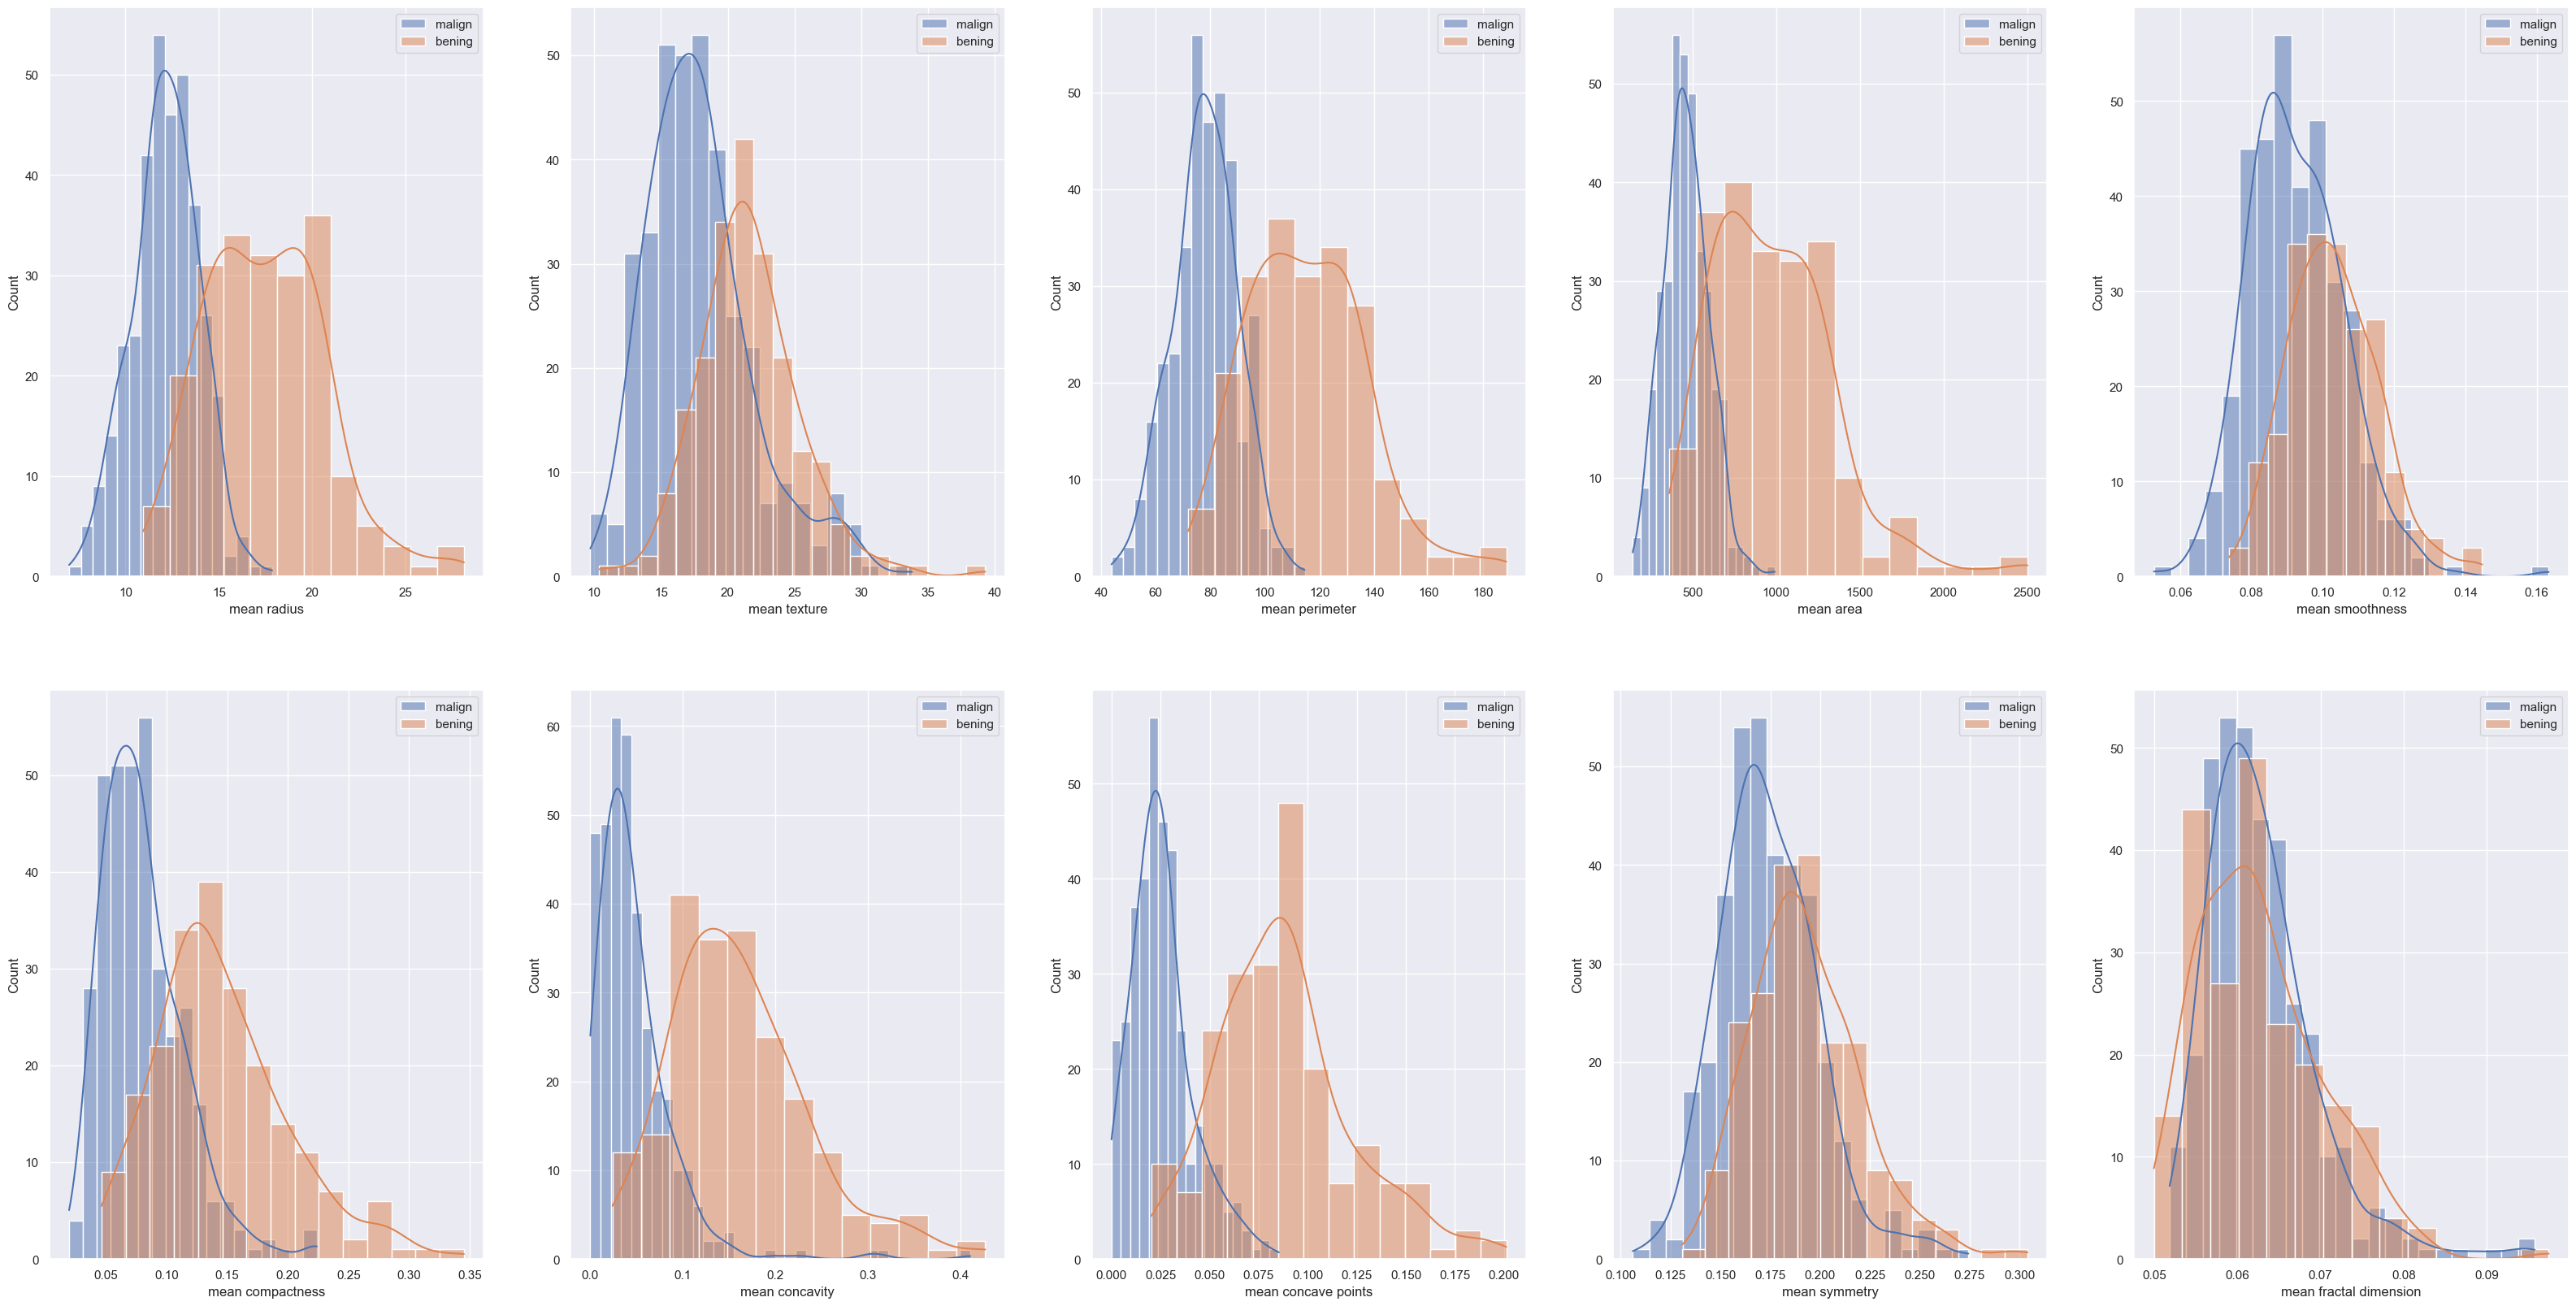

In [100]:
mean = list(cancer_df.columns[0:10])
st_err = list(cancer_df.columns[11:20])
worst = list(cancer_df.columns[21:30])
plt.figure(figsize = (40, 20))
for i in range(len(mean)):
    plt.subplot(2,5,i+1)
    sns.histplot(cancer_df_malign[mean[i]], kde = True, label = 'malign')
    sns.histplot(cancer_df_bening[mean[i]], kde = True, label = 'bening')
    plt.legend()
plt.show()

<div class="alert alert-block alert-warning">On peut remarquer les hypothèses suivantes:
    <ul>
        <li><strong>Radius_mean, perimeter_mean, area_mean, compactess_mean, concavity_mean, concave points_mean</strong> sont particulièrement liée à un cancer</li>
        <li><strong>Texture_mean, smoothness_mean, symetry_mean, fractal_dimension_mean</strong> sont un peu moins voir peut reliés à un cancer</li>
    </ul>
       Cela reste des hypothèses à vérifier
</div>

Analysons les coorélation entre les variables.

<Axes: >

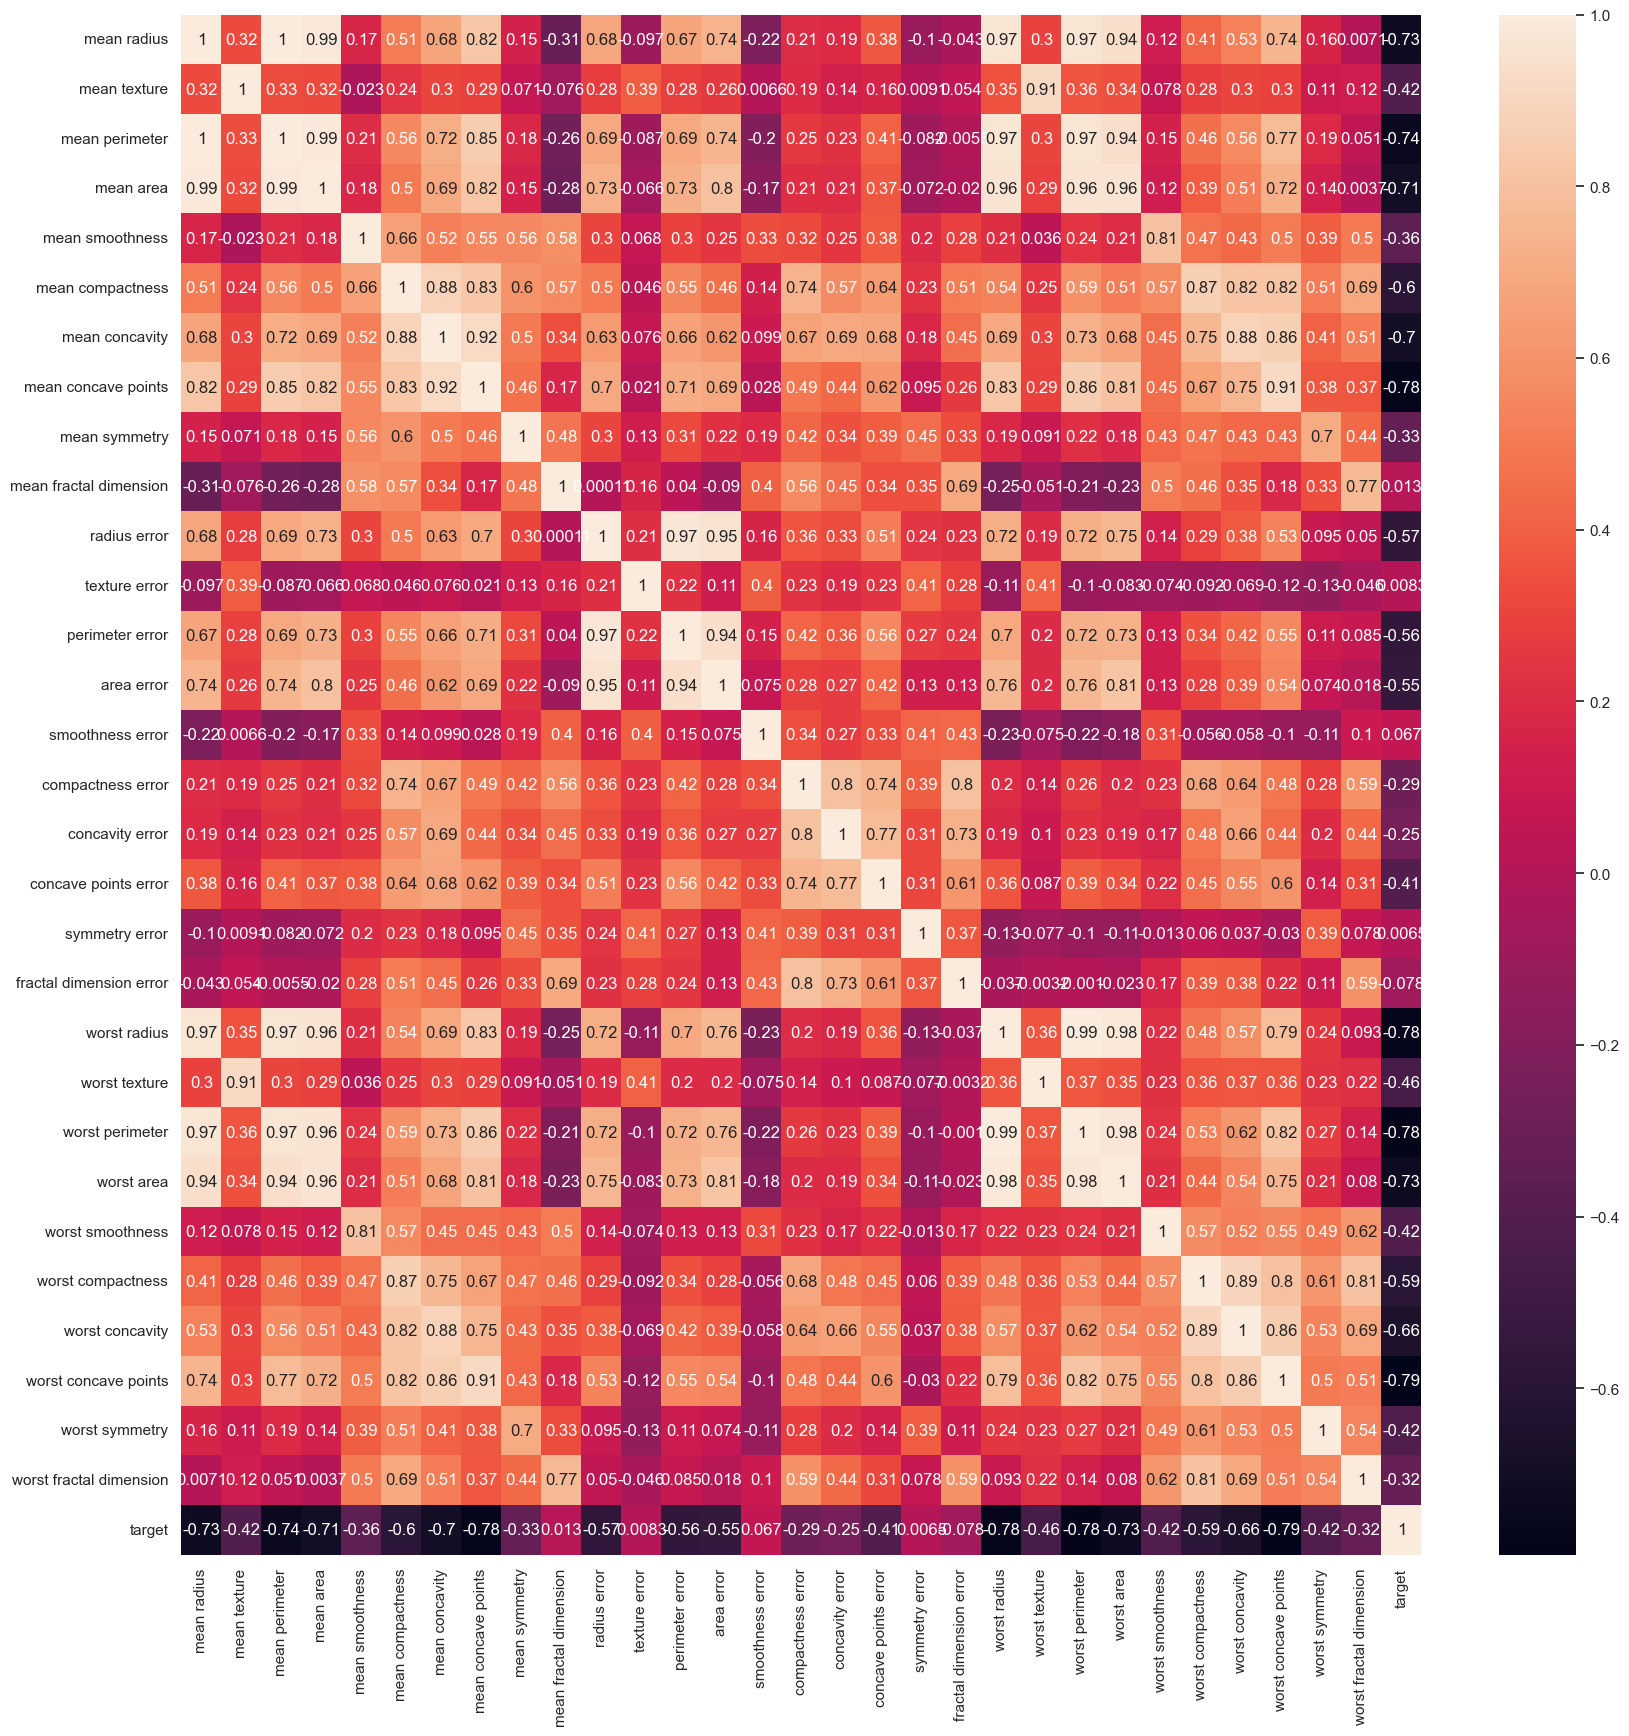

In [101]:
plt.figure(figsize = (20,20))
sns.heatmap(cancer_df.corr(numeric_only = True), annot = True)

On peut remarquer que certaines variables sont très coorélées entre elles (>0,9) mais certaine logique en effet le périmetre est relié au rayon etc ...
Vérifions les corrélation dans un mème sous groupement (mean, worst, standard error)

Par catégories

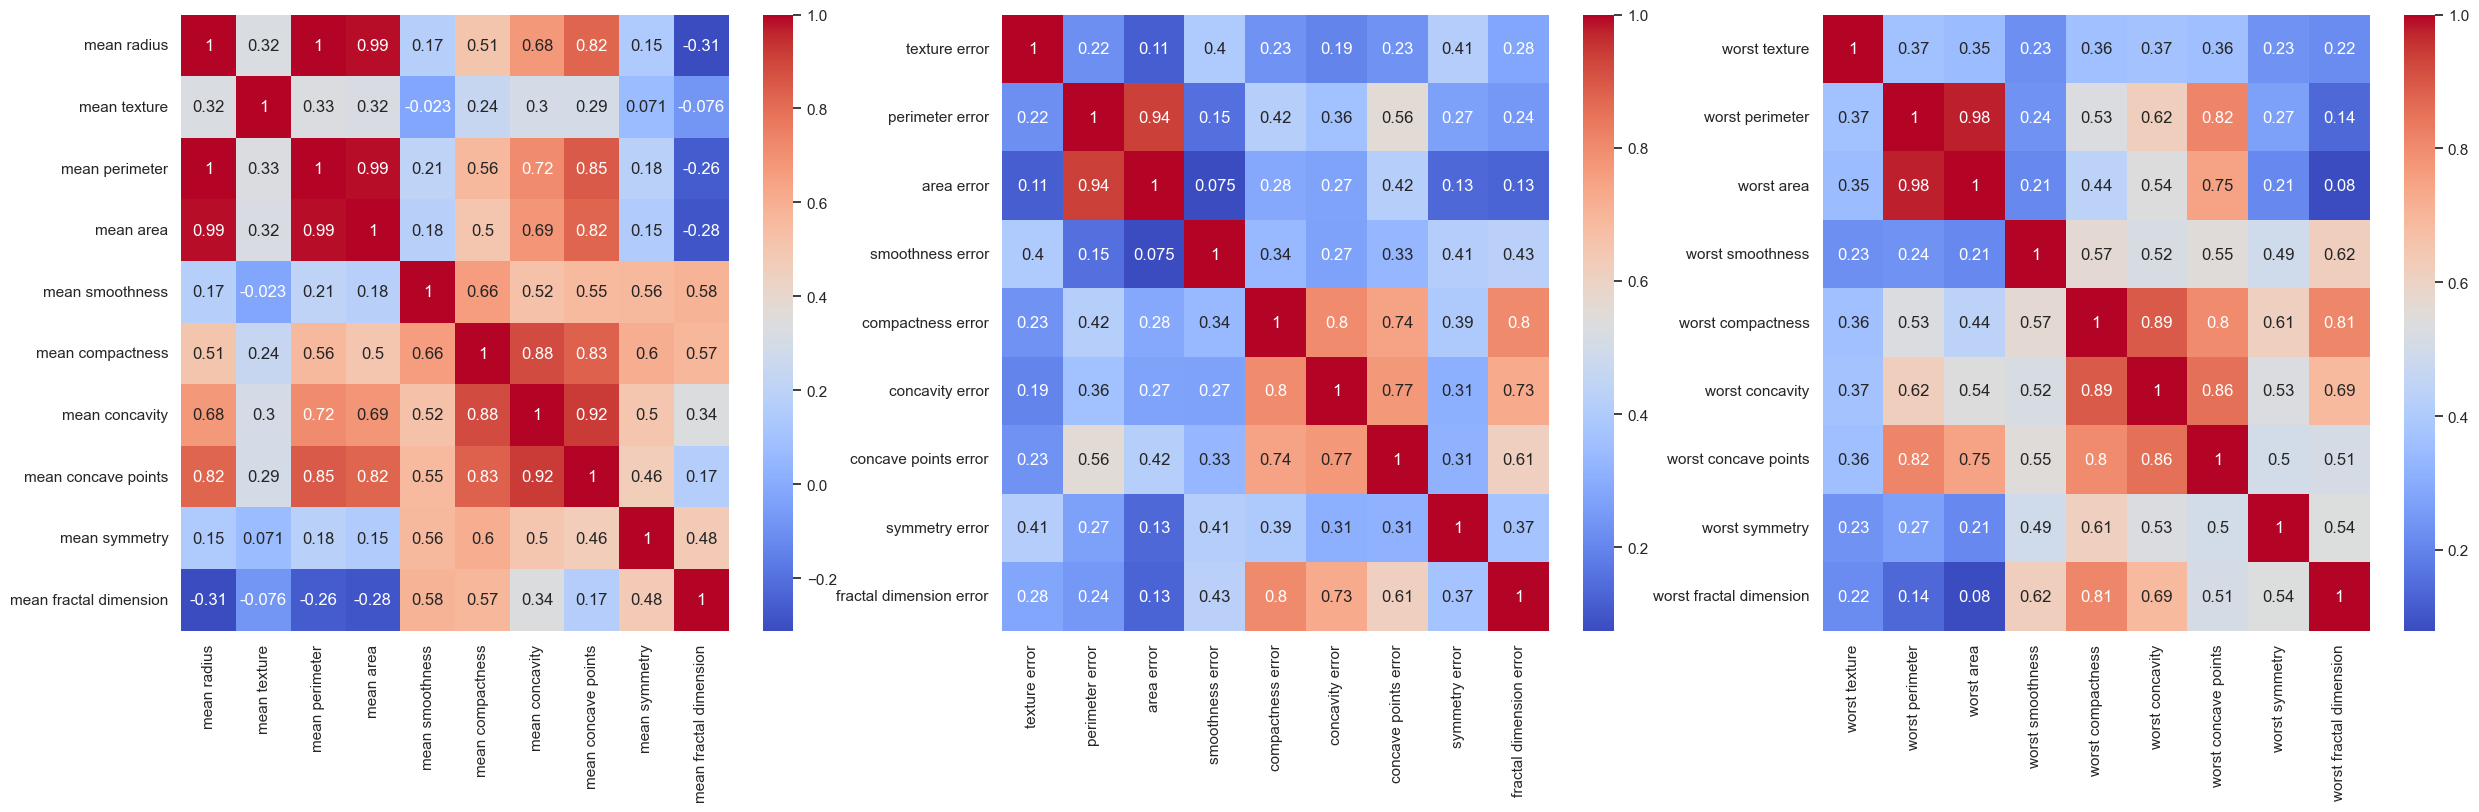

In [102]:
plt.figure(figsize = (30,8))

mean = list(cancer_df.columns[0:10])
st_err = list(cancer_df.columns[11:20])
worst = list(cancer_df.columns[21:30])

plt.subplot(1,3,1)
sns.heatmap(cancer_df[mean].corr(), annot=True,cmap='coolwarm')
plt.subplot(1,3,2)
sns.heatmap(cancer_df[st_err].corr(), annot=True,cmap='coolwarm')
plt.subplot(1,3,3)
sns.heatmap(cancer_df[worst].corr(), annot=True,cmap='coolwarm')

plt.show()

1/50, error=0.1208, acc=0.8681318681318682
2/50, error=0.0441, acc=0.9582417582417583
3/50, error=0.0302, acc=0.978021978021978
4/50, error=0.0236, acc=0.9824175824175824
5/50, error=0.0198, acc=0.9802197802197802
6/50, error=0.0174, acc=0.9802197802197802
7/50, error=0.0157, acc=0.9868131868131869
8/50, error=0.0144, acc=0.9868131868131869
9/50, error=0.0134, acc=0.989010989010989
10/50, error=0.0126, acc=0.989010989010989
11/50, error=0.0118, acc=0.9912087912087912
12/50, error=0.0112, acc=0.9912087912087912
13/50, error=0.0106, acc=0.9912087912087912
14/50, error=0.0101, acc=0.9934065934065934
15/50, error=0.0096, acc=0.9934065934065934
16/50, error=0.0091, acc=0.9934065934065934
17/50, error=0.0087, acc=0.9934065934065934
18/50, error=0.0083, acc=0.9934065934065934
19/50, error=0.0080, acc=0.9934065934065934
20/50, error=0.0076, acc=0.9934065934065934
21/50, error=0.0073, acc=0.9934065934065934
22/50, error=0.0070, acc=0.9934065934065934
23/50, error=0.0067, acc=0.9934065934065934


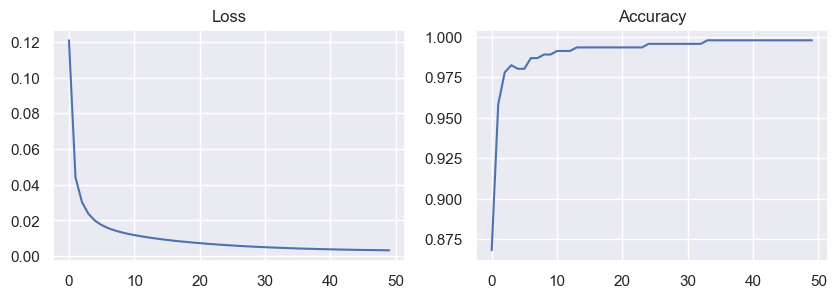

In [103]:
y_CANCER_encode = np_utils.to_categorical(y_CANCER_train)
net_CANCER = [
    Dense(30, 100),
    Relu(),
    Dense(100, 10),
    Relu(),
    Dense(10, 2),
    Softmax(2)
] 
Model_CANCER = Sequential(net_CANCER)
Model_CANCER.compiler(loss= MSE())
Model_CANCER.fit(X_CANCER_train.reshape(len(X_CANCER_train[0:]), 1, 30), y_CANCER_encode, epochs=50, learning_rate=0.01)
Model_CANCER.plot_history_acc()

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       169
           1       1.00      1.00      1.00       286

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455



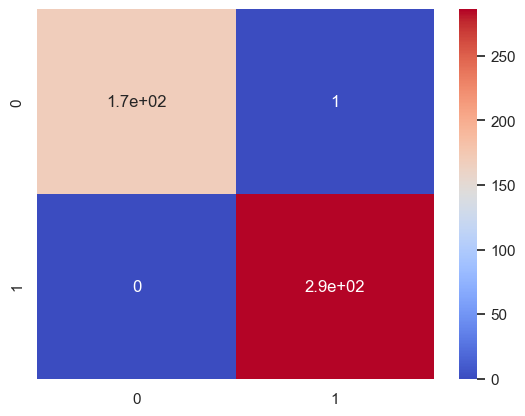

In [104]:
eval_modele(Model_CANCER,  X_CANCER_train, y_CANCER_train)

              precision    recall  f1-score   support

           0       0.95      0.95      0.95        43
           1       0.97      0.97      0.97        71

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



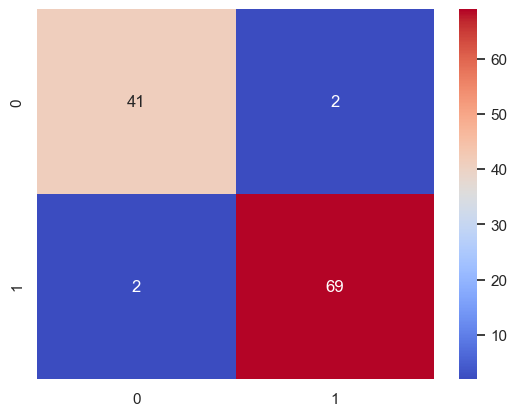

In [105]:
eval_modele(Model_CANCER,  X_CANCER_test, y_CANCER_test)

Epoch 1/100
15/15 [==============================] - 1s 4ms/step - loss: 0.7253 - accuracy: 0.6242
Epoch 2/100
15/15 [==============================] - 0s 2ms/step - loss: 0.4753 - accuracy: 0.8549
Epoch 3/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3820 - accuracy: 0.9055
Epoch 4/100
15/15 [==============================] - 0s 2ms/step - loss: 0.3246 - accuracy: 0.9209
Epoch 5/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2793 - accuracy: 0.9385
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.2425 - accuracy: 0.9516
Epoch 7/100
15/15 [==============================] - 0s 2ms/step - loss: 0.2150 - accuracy: 0.9604
Epoch 8/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1935 - accuracy: 0.9626
Epoch 9/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1761 - accuracy: 0.9648
Epoch 10/100
15/15 [==============================] - 0s 2ms/step - loss: 0.1618 - accuracy: 0.9670
Epoch 11/

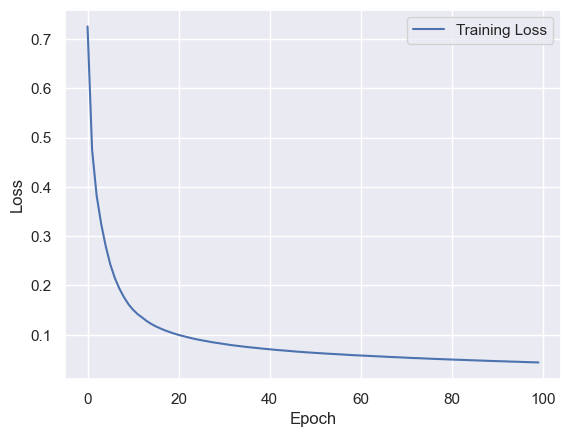

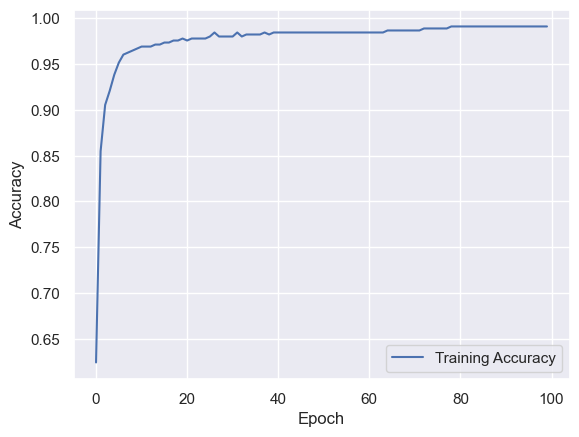

In [106]:
model_CANCER_tf = keras.Sequential([
    layers.Dense(100, activation="relu"),
    layers.Dense(10, activation="relu"),
    layers.Dense(2, activation="softmax"),
])

optimizer = keras.optimizers.SGD(learning_rate=0.01)
model_CANCER_tf.compile(optimizer=optimizer, loss="sparse_categorical_crossentropy", metrics=["accuracy"])
model_history = model_CANCER_tf.fit(X_CANCER_train, y_CANCER_train, epochs=100)

plt.plot(model_history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(model_history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

4/4 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        43
           1       0.99      0.99      0.99        71

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



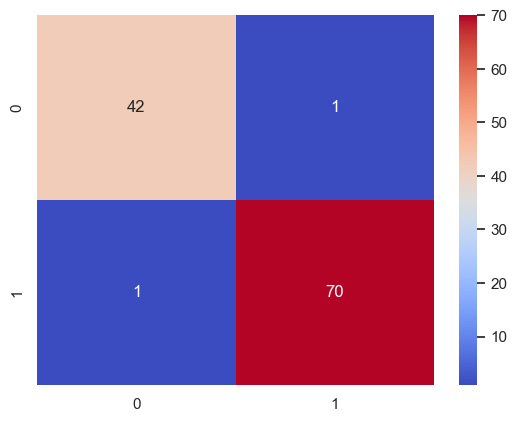

In [107]:
eval_modele(model_CANCER_tf,  X_CANCER_test, y_CANCER_test)

## Classification d'images

Le but de cette section est de montrer l'utilisation d'un feed forward network pour la reconnaissance d'images.

### MNIST DATASET

Le dataset MNIST est un ensemble de données en vision par ordinateur. Il est composé d'un ensemble de 70 000 images en noir et blanc de chiffres manuscrits, chacun étant une image de 28 pixels de large par 28 pixels de haut. Ces images sont des exemples de chiffres de 0 à 9.

In [108]:
from keras.datasets import mnist

In [109]:
(x_DIGITS_train, y_DIGITS_train), (x_DIGITS_test, y_DIGITS_test) = mnist.load_data()
print("la shape du train image est :", x_DIGITS_train.shape)
print("la shape du train labels est :", y_DIGITS_train.shape)
print("la shape du test image est :", x_DIGITS_test.shape)
print("la shape du test labels est :", y_DIGITS_test.shape)
print(f'min : {x_DIGITS_test.min()}, max : {x_DIGITS_test.max()}')

la shape du train image est : (60000, 28, 28)
la shape du train labels est : (60000,)
la shape du test image est : (10000, 28, 28)
la shape du test labels est : (10000,)
min : 0, max : 255


Ce jeu de données est constitué de 60 000 images représentant des chiffres écrits à la main. Chaque image est une matrice de dimensions (28, 28), où chaque pixel est représenté par une valeur comprise entre 0 et 255, reflétant une échelle de gris. Pour améliorer la stabilité et l'efficacité de l'entraînement du modèle, nous allons normaliser les données en ramenant chaque pixel à une échelle entre 0 et 1. Cette étape est cruciale pour garantir une convergence efficace du modèle. De plus, nous appliquerons la technique du "one-hot encoding" à la target (y_train) afin de représenter les classes de manière binaire.

In [110]:
def Preprocessing_image(X_train, y_train, X_test, y_test, stop = 10000):
    X_train = X_train.astype('float32')
    X_train = X_train / 255
    y_train = np_utils.to_categorical(y_train)
    X_test = X_test.astype('float32')
    X_test = X_test / 255
    return X_train[0: stop], y_train[0:stop], X_test, y_test

In [111]:
X_DIGITS_train, y_DIGITS_train_pre, X_DIGITS_test, y_DIGITS_test = Preprocessing_image(x_DIGITS_train, y_DIGITS_train, x_DIGITS_test, y_DIGITS_test)

#### Notre model

Nous devons appliquer le flattenlayer qui permet d'applatir chacunes des images. (28, 28) -> (1, 28). Chaque pixel est concidéré comme une varibles on a donc une couche d'entrée de $28\times28$ neurones

1/10, error=0.0391, acc=0.884
2/10, error=0.0180, acc=0.9459
3/10, error=0.0110, acc=0.9684
4/10, error=0.0068, acc=0.9811
5/10, error=0.0044, acc=0.9878
6/10, error=0.0026, acc=0.9929
7/10, error=0.0017, acc=0.9959
8/10, error=0.0012, acc=0.9977
9/10, error=0.0006, acc=0.9994
10/10, error=0.0004, acc=0.9997


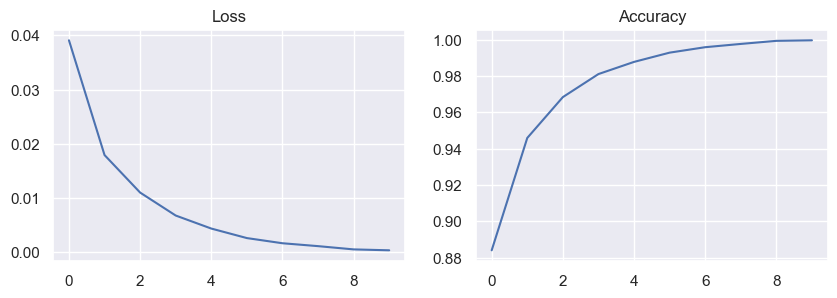

In [112]:
net_DIGITS = [
    FlattenLayer(28*28),
    Dense(28 * 28, 128),
    Relu(),
    Dense(128, 10),
    Softmax(10)
]

Model_DIGITS = Sequential(net_DIGITS)
Model_DIGITS.compiler(loss= CategoricalCrossentropy(), learning_rate= 0.2)
Model_DIGITS.fit(X_DIGITS_train, y_DIGITS_train_pre, epochs=10, learning_rate=0.1)
Model_DIGITS.plot_history_acc()

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        97
           1       1.00      1.00      1.00       116
           2       1.00      1.00      1.00        99
           3       1.00      1.00      1.00        93
           4       1.00      1.00      1.00       105
           5       1.00      1.00      1.00        92
           6       1.00      1.00      1.00        94
           7       1.00      1.00      1.00       117
           8       1.00      1.00      1.00        87
           9       1.00      1.00      1.00       100

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000



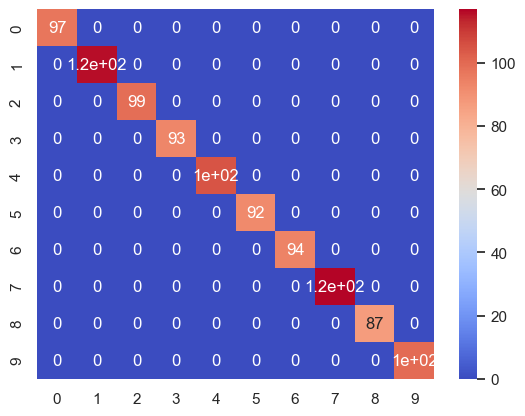

In [115]:
eval_modele(Model_DIGITS,  X_DIGITS_train[0:1000], y_DIGITS_train[0:1000])

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        85
           1       0.98      0.99      0.99       126
           2       0.92      0.95      0.94       116
           3       0.97      0.96      0.97       107
           4       0.98      0.90      0.94       110
           5       0.98      0.94      0.96        87
           6       0.97      0.95      0.96        87
           7       0.95      0.95      0.95        99
           8       0.91      0.93      0.92        89
           9       0.90      0.96      0.93        94

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



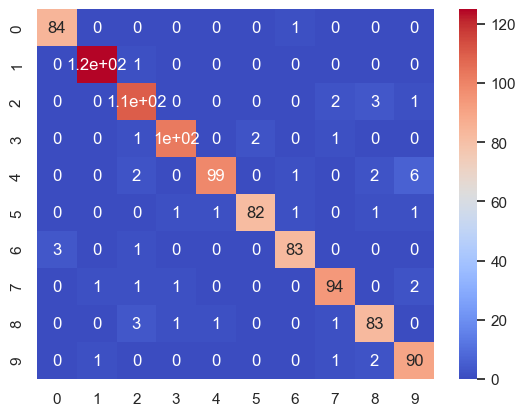

In [116]:
eval_modele(Model_DIGITS,  X_DIGITS_test[0:1000], y_DIGITS_test[0:1000])

On pourrait être en surajustement même si un taux de précision de 95% est déjà satisfaisant. Cependant, en le comparant aux résultats sur l'ensemble d'entraînement qui atteignent une précision de 100%, il semble y avoir une légère disparité .

#### Tensorflow Keras

Epoch 1/10
313/313 [==============================] - 1s 2ms/step - loss: 0.4733 - accuracy: 0.8606
Epoch 2/10
313/313 [==============================] - 1s 2ms/step - loss: 0.2262 - accuracy: 0.9344
Epoch 3/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1635 - accuracy: 0.9511
Epoch 4/10
313/313 [==============================] - 1s 2ms/step - loss: 0.1231 - accuracy: 0.9646
Epoch 5/10
313/313 [==============================] - 2s 6ms/step - loss: 0.1008 - accuracy: 0.9692
Epoch 6/10
313/313 [==============================] - 3s 9ms/step - loss: 0.0769 - accuracy: 0.9786
Epoch 7/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0612 - accuracy: 0.9832
Epoch 8/10
313/313 [==============================] - 2s 7ms/step - loss: 0.0475 - accuracy: 0.9889
Epoch 9/10
313/313 [==============================] - 2s 8ms/step - loss: 0.0372 - accuracy: 0.9917
Epoch 10/10
313/313 [==============================] - 2s 6ms/step - loss: 0.0311 - accuracy: 0.9922

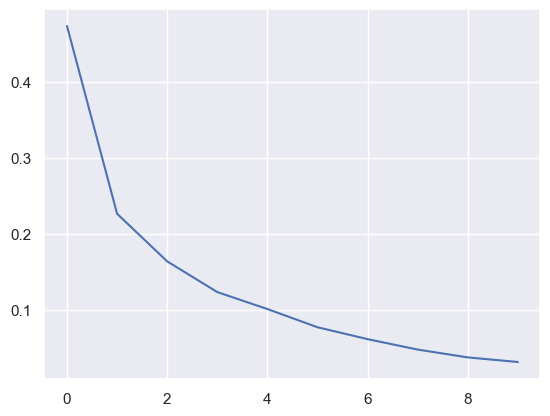

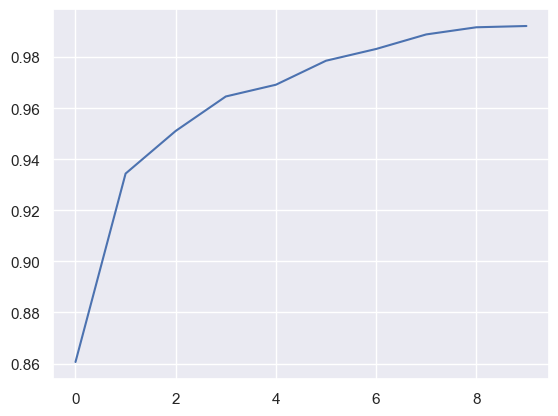

In [117]:
model_DIGITS_tf = keras.Sequential([
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ])
optimizer = keras.optimizers.SGD(learning_rate=0.2)
model_DIGITS_tf.compile(optimizer=optimizer ,loss="categorical_crossentropy", metrics=["accuracy"])
model_DIGITS_tf.fit(X_DIGITS_train, y_DIGITS_train_pre, epochs=10)
plt.plot(model_DIGITS_tf.history.history['loss'])
plt.show()
plt.plot(model_DIGITS_tf.history.history['accuracy'])

32/32 [==============================] - 0s 3ms/step
              precision    recall  f1-score   support

           0       0.95      0.99      0.97        85
           1       0.98      0.99      0.99       126
           2       0.94      0.97      0.95       116
           3       0.95      0.97      0.96       107
           4       0.98      0.92      0.95       110
           5       0.93      0.95      0.94        87
           6       0.96      0.93      0.95        87
           7       0.95      0.95      0.95        99
           8       0.94      0.89      0.91        89
           9       0.92      0.95      0.93        94

    accuracy                           0.95      1000
   macro avg       0.95      0.95      0.95      1000
weighted avg       0.95      0.95      0.95      1000



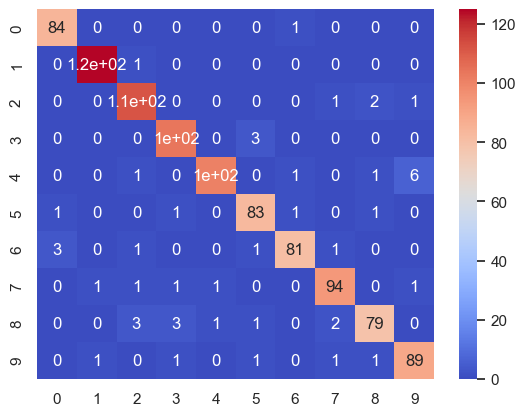

In [118]:
eval_modele(model_DIGITS_tf,  X_DIGITS_test[0:1000], y_DIGITS_test[0:1000])

Visualisons les prédictions
que nous avons fait sur le test set

In [119]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    class_names = np.array([str(i) for i in np.arange(10)])
    plt.xlabel(f'{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label]})', color=color)
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

Prédiction d'un individu

In [120]:
predictions = Model_DIGITS.predict( X_DIGITS_test[0:100])
print(predictions[0])
print(f'La classe du premier élément du test set est : {np.argmax(predictions[0])}')
print(f'La vraie classe associé au premier élément du test set est : {y_DIGITS_test[0]}')

[[8.62564088e-14 1.02510041e-10 6.95175661e-09 9.28420579e-07
  6.17639670e-16 6.52917000e-13 6.33173890e-17 9.99999064e-01
  1.14656848e-12 5.67927291e-11]]
La classe du premier élément du test set est : 7
La vraie classe associé au premier élément du test set est : 7


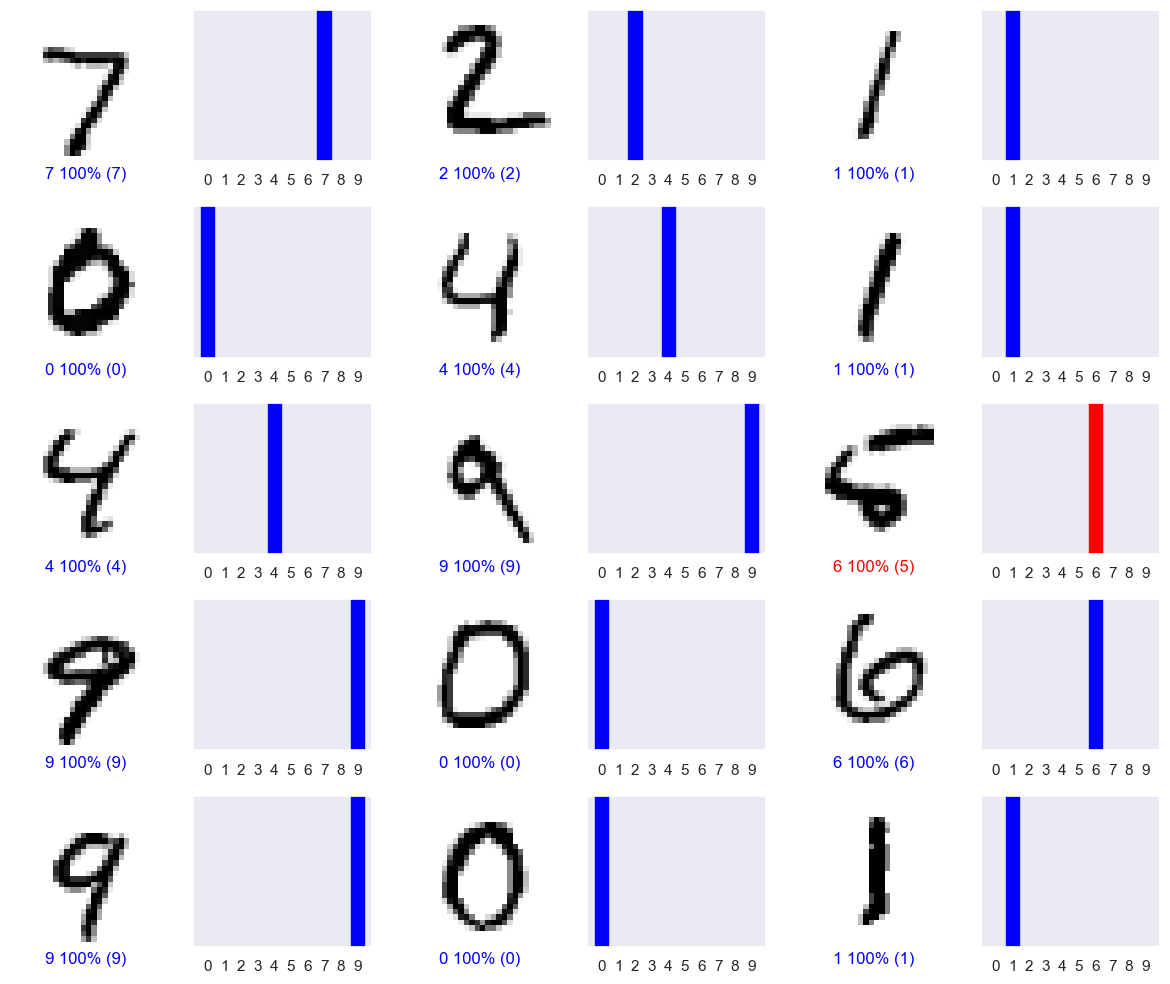

In [121]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions[i], y_DIGITS_test, X_DIGITS_test[0:100])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions[i], y_DIGITS_test)
plt.tight_layout()
plt.show()

### Cifar 10

Le CIFAR-10 (Canadian Institute for Advanced Research) est un ensemble de données utilisé en apprentissage automatique et en vision par ordinateur. Le CIFAR-10 contient un total de 60 000 images couleur (32x32 pixels) réparties en 10 classes distinctes, avec 6 000 images par classe. Ces classes comprennent :

- Avion (Airplane)
- Automobile (Automobile)
- Oiseau (Bird)
- Chat (Cat)
- Cerf (Deer)
- Chien (Dog)
- Grenouille (Frog)
- Cheval (Horse)
- Navire (Ship)
- Camion (Truck)

Chaque image du CIFAR-10 est une image en couleur avec trois canaux (rouge, vert, bleu), et chaque canal a une résolution de 32x32 pixels. Ainsi, chaque image est représentée par une matrice de dimensions 32x32x3.

Le CIFAR-10 est souvent utilisé comme benchmark pour évaluer les performances des algorithmes d'apprentissage automatique, en particulier dans le domaine de la vision par ordinateur. Les tâches courantes incluent la classification d'image, où l'objectif est de construire des modèles capables de classer correctement les images dans l'une des dix catégories.

In [122]:
(x_cifar10_train, y_cifar10_train), (x_cifar10_test, y_cifar10_test) = tf.keras.datasets.cifar10.load_data()
print("Shape of CIFAR-10 train images:", x_cifar10_train.shape)
print("Shape of CIFAR-10 train labels:", y_cifar10_train.shape)
print("Shape of CIFAR-10 test images:", x_cifar10_test.shape)
print("Shape of CIFAR-10 test labels:", y_cifar10_test.shape)
print(f'Min pixel value: {x_cifar10_test.min()}, Max pixel value: {x_cifar10_test.max()}')

Shape of CIFAR-10 train images: (50000, 32, 32, 3)
Shape of CIFAR-10 train labels: (50000, 1)
Shape of CIFAR-10 test images: (10000, 32, 32, 3)
Shape of CIFAR-10 test labels: (10000, 1)
Min pixel value: 0, Max pixel value: 255


In [123]:
np.unique(y_cifar10_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [124]:
class_names = [
    'Avion', 'Automobile', 'Oiseau', 'Chat', 'Cerf',
    'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion'
]

In [125]:
def show_cifar_images(images, labels, class_names, num_images=5):
    plt.figure(figsize=(10, 5))
    for i in range(num_images):
        plt.subplot(1, num_images, i + 1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

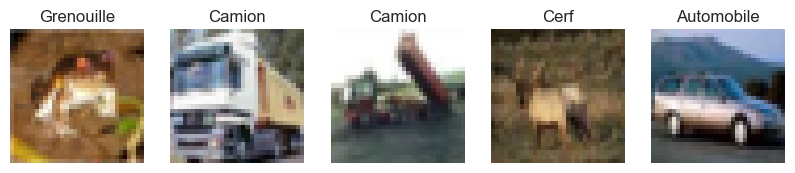

In [126]:
show_cifar_images(x_cifar10_train, y_cifar10_train, class_names)

Nous allons normaliser les pixels et encoder la target

In [127]:
X_cifar10_train, y_cifar10_train, X_cifar10_test, y_cifar10_test = Preprocessing_image(x_cifar10_train, y_cifar10_train, x_cifar10_test, y_cifar10_test)

1/30, error=0.2111, acc=0.2046
2/30, error=0.1952, acc=0.2715
3/30, error=0.1891, acc=0.2943
4/30, error=0.1849, acc=0.3215
5/30, error=0.1814, acc=0.3351
6/30, error=0.1783, acc=0.3478
7/30, error=0.1754, acc=0.3574
8/30, error=0.1732, acc=0.368
9/30, error=0.1713, acc=0.3763
10/30, error=0.1696, acc=0.3826
11/30, error=0.1682, acc=0.39
12/30, error=0.1670, acc=0.3947
13/30, error=0.1658, acc=0.3988
14/30, error=0.1646, acc=0.4033
15/30, error=0.1636, acc=0.4091
16/30, error=0.1626, acc=0.413
17/30, error=0.1617, acc=0.419
18/30, error=0.1608, acc=0.421
19/30, error=0.1600, acc=0.425
20/30, error=0.1592, acc=0.4292
21/30, error=0.1584, acc=0.4337
22/30, error=0.1577, acc=0.4361
23/30, error=0.1570, acc=0.4402
24/30, error=0.1563, acc=0.4435
25/30, error=0.1556, acc=0.4473
26/30, error=0.1550, acc=0.4471
27/30, error=0.1545, acc=0.4505
28/30, error=0.1539, acc=0.4517
29/30, error=0.1533, acc=0.4534
30/30, error=0.1526, acc=0.4566


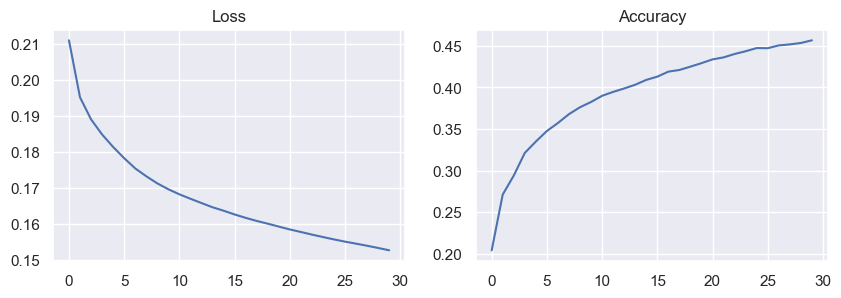

In [128]:
net_cifar10 = [
    FlattenLayer(32*32*3),
    Dense(32*32*3, 20),
    Relu(),
    Dense(20, 10),
    Softmax(10)
]

Model_cifar10 = Sequential(net_cifar10)
Model_cifar10.compiler(loss= CategoricalCrossentropy())
Model_cifar10.fit(X_cifar10_train, y_cifar10_train, epochs=30, learning_rate=0.01)
Model_cifar10.plot_history_acc()

In [129]:
predictions_cifar10 = Model_cifar10.predict(X_cifar10_test[0:100])

In [130]:
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    class_names = [
    'Avion', 'Automobile', 'Oiseau', 'Chat', 'Cerf',
    'Chien', 'Grenouille', 'Cheval', 'Bateau', 'Camion'
]
    plt.xlabel(f'{class_names[predicted_label]} {100*np.max(predictions_array):2.0f}% ({class_names[true_label[0]]})', color=color)
    
    
def plot_value_array(i, predictions_array, true_label):
    true_label = true_label[i][0]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array[0], color="#777777")
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)

    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

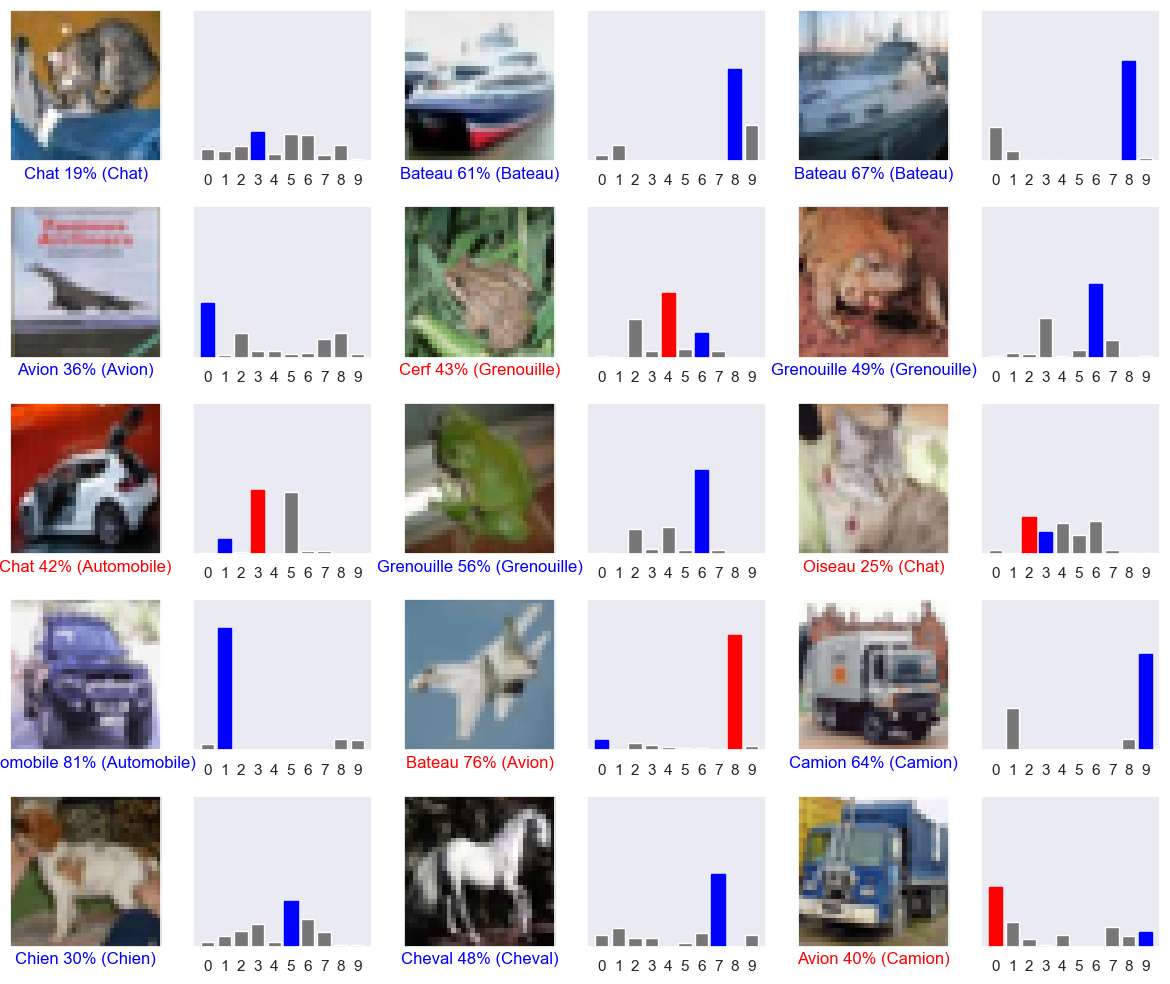

In [131]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, 2*num_cols, 2*i+1)
    plot_image(i, predictions_cifar10[i], y_cifar10_test, X_cifar10_test[0:100])
    plt.subplot(num_rows, 2*num_cols, 2*i+2)
    plot_value_array(i, predictions_cifar10[i], y_cifar10_test)
plt.tight_layout()
plt.show()

Epoch 1/20
313/313 [==============================] - 4s 9ms/step - loss: 2.0581 - accuracy: 0.2505
Epoch 2/20
313/313 [==============================] - 3s 10ms/step - loss: 1.8928 - accuracy: 0.3237
Epoch 3/20
313/313 [==============================] - 2s 6ms/step - loss: 1.8222 - accuracy: 0.3553
Epoch 4/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7731 - accuracy: 0.3729
Epoch 5/20
313/313 [==============================] - 2s 7ms/step - loss: 1.7356 - accuracy: 0.3910
Epoch 6/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6994 - accuracy: 0.3997
Epoch 7/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6696 - accuracy: 0.4108
Epoch 8/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6439 - accuracy: 0.4186
Epoch 9/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6237 - accuracy: 0.4316
Epoch 10/20
313/313 [==============================] - 2s 7ms/step - loss: 1.6075 - accuracy: 0.434

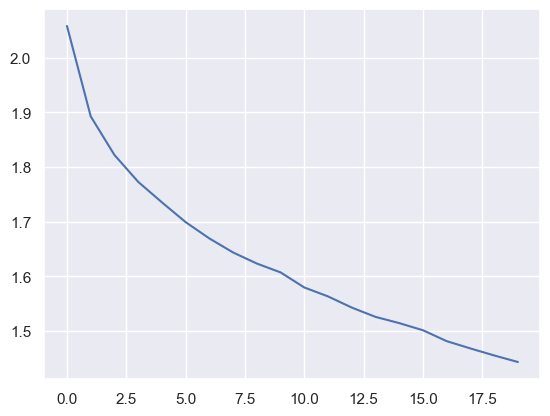

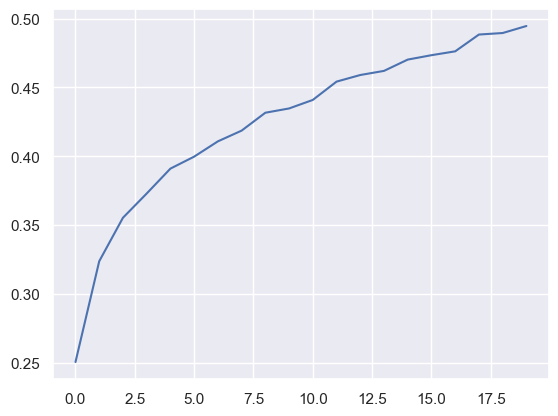

In [132]:
model_CIFAR_tf = keras.Sequential([
        layers.Flatten(),
        layers.Dense(128, activation="relu"),
        layers.Dense(10, activation="softmax"),
    ])
optimizer = keras.optimizers.SGD(learning_rate=0.01)
model_CIFAR_tf.compile(optimizer=optimizer ,loss="categorical_crossentropy", metrics=["accuracy"])
model_CIFAR_tf.fit(X_cifar10_train, y_cifar10_train, epochs=20)
plt.plot(model_CIFAR_tf.history.history['loss'])
plt.show()
plt.plot(model_CIFAR_tf.history.history['accuracy'])

TensorFlow surpasse notre modèle en termes de traitement d'images de plus grande dimension et de couleur. Sa puissance supérieure et son optimisation avancée se traduisent par une vitesse d'apprentissage nettement plus rapide.

In [133]:
Model_cifar10.summary()

Flatten()
Dense() : input shape = 3072, output_shape = 20
Relu()
Dense() : input shape = 20, output_shape = 10
Softmax()
Le model a 61670 paramètres


In [134]:
model_CIFAR_tf.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 3072)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               393344    
                                                                 
 dense_12 (Dense)            (None, 10)                1290      
                                                                 
Total params: 394,634
Trainable params: 394,634
Non-trainable params: 0
_________________________________________________________________


Lorsque nous traitons des images de grande taille comportant des informations couleur, nous observons une notable augmentation du nombre de paramètres dans un réseau neuronal à propagation avant (feedforward). C'est précisément pour résoudre cette complexité que les réseaux de neurones convolutionnels ont été développés.

In [135]:
model_CIFAR_conv = keras.Sequential()
model_CIFAR_conv.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_CIFAR_conv.add(layers.MaxPooling2D((2, 2)))
model_CIFAR_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CIFAR_conv.add(layers.MaxPooling2D((2, 2)))
model_CIFAR_conv.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_CIFAR_conv.add(layers.Flatten())
model_CIFAR_conv.add(layers.Dense(64, activation='relu'))
model_CIFAR_conv.add(layers.Dense(10, activation='softmax'))

# Compiler le modèle
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01)
model_CIFAR_conv .compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# Entraîner le modèle
history = model_CIFAR_conv .fit(X_cifar10_train, y_cifar10_train, epochs=20)

Epoch 1/20
313/313 [==============================] - 21s 65ms/step - loss: 2.2882 - accuracy: 0.1244
Epoch 2/20
313/313 [==============================] - 18s 59ms/step - loss: 2.1726 - accuracy: 0.1888
Epoch 3/20
313/313 [==============================] - 19s 59ms/step - loss: 2.0448 - accuracy: 0.2445
Epoch 4/20
313/313 [==============================] - 20s 63ms/step - loss: 1.9710 - accuracy: 0.2750
Epoch 5/20
313/313 [==============================] - 21s 66ms/step - loss: 1.9016 - accuracy: 0.3082
Epoch 6/20
313/313 [==============================] - 19s 60ms/step - loss: 1.8255 - accuracy: 0.3387
Epoch 7/20
313/313 [==============================] - 20s 65ms/step - loss: 1.7411 - accuracy: 0.3669
Epoch 8/20
313/313 [==============================] - 19s 60ms/step - loss: 1.6617 - accuracy: 0.3989
Epoch 9/20
313/313 [==============================] - 19s 60ms/step - loss: 1.6073 - accuracy: 0.4229
Epoch 10/20
313/313 [==============================] - 19s 61ms/step - loss: 1.549

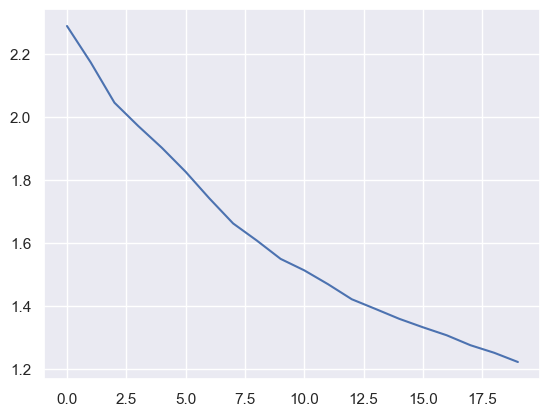

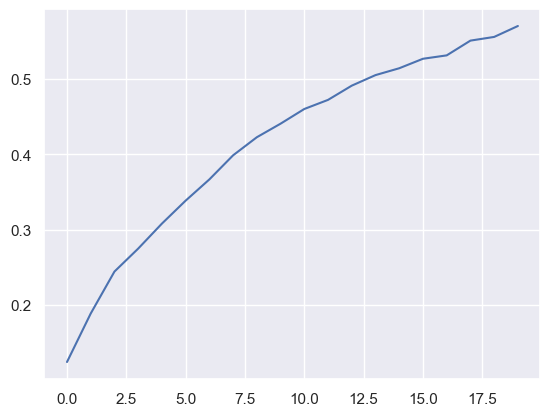

In [136]:
plt.plot(model_CIFAR_conv.history.history['loss'])
plt.show()
plt.plot(model_CIFAR_conv.history.history['accuracy'])

32/32 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

           0       0.48      0.38      0.42       103
           1       0.74      0.29      0.42        89
           2       0.55      0.11      0.18       100
           3       0.29      0.22      0.25       103
           4       0.27      0.29      0.28        90
           5       0.37      0.22      0.28        86
           6       0.46      0.61      0.53       112
           7       0.33      0.70      0.45       102
           8       0.52      0.64      0.58       106
           9       0.45      0.60      0.52       109

    accuracy                           0.42      1000
   macro avg       0.45      0.41      0.39      1000
weighted avg       0.45      0.42      0.40      1000



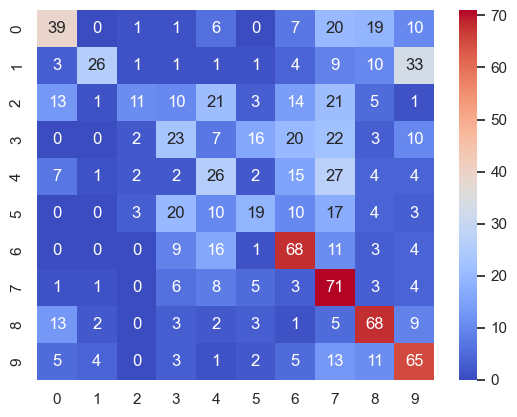

In [139]:
eval_modele(model_CIFAR_tf,  X_cifar10_test[0:1000], y_cifar10_test[0:1000])

32/32 [==============================] - 0s 4ms/step
              precision    recall  f1-score   support

           0       0.61      0.45      0.52       103
           1       0.47      0.85      0.61        89
           2       0.57      0.25      0.35       100
           3       0.29      0.31      0.30       103
           4       0.39      0.51      0.44        90
           5       0.50      0.31      0.39        86
           6       0.45      0.83      0.58       112
           7       0.79      0.45      0.58       102
           8       0.63      0.74      0.68       106
           9       0.81      0.40      0.54       109

    accuracy                           0.51      1000
   macro avg       0.55      0.51      0.50      1000
weighted avg       0.56      0.51      0.50      1000



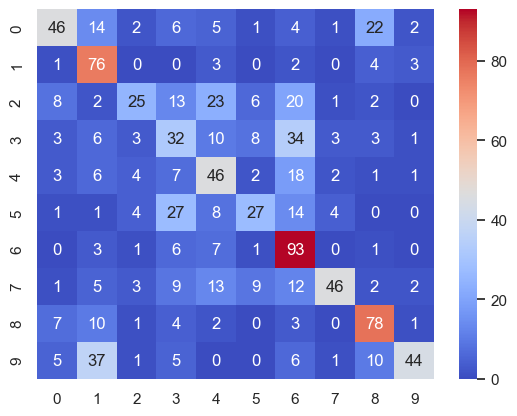

In [137]:
eval_modele(model_CIFAR_conv,  X_cifar10_test[0:1000], y_cifar10_test[0:1000])

# Dans l'autres notebook nous avons générer des images à l'aide de GAN avec pytorch